# Electric Motor Torque Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import joblib

In [3]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [4]:
df = pd.read_csv('measures_v2.csv')
df.describe()

u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e+01   
std    1.859663e+03  6.493323e+01  9.218188e+01  1.900150e+01  1.999100e+01   
min   -2.755491e+02 -2.780036e+02 -2.934268e+02  2.085696e+01  1.807669e+01   
25%    3.171107e+02 -1.154061e+02  1.095863e+00  4.315158e+01  3.199033e+01   
50%    1.999977e+03 -5.109376e+01  1.577401e+01  6.026629e+01  4.562551e+01   
75%    3.760639e+03 -2.979688e+00  1.006121e+02  7.200837e+01  6.146083e+01   
max    6.000015e+03  5.189670e-02  3.017079e+02  1.136066e+02  1.011480e+02   

            ambient        torque    profile_id  
count  1.330816e+06  1.330816e+06  1.330816e+06  
mean   2.456526e+01  3.110603e+01  4.079306e+01  
std    1.929522e+00  7.713575e+01  2.504549e+01  
min    8.783478e+00 -2.464667e+02  2.000000e+00  
25%    2.318480e+01 -1.374265e-01  1.700000e+01  
50%    2.479733e+01  1.086035e+01  4.300000e+01  
75%    2.621702e+01  9.159718e+01  6.500000e+01  
max    3.071420e+01  2.610057e+02  8.100000e+01

## Reorganizing the dataset

In [5]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [6]:
df = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 
         'pm', 'stator_yoke', 'ambient', 'motor_speed', 'torque']]
df.columns

Index(['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth',
       'pm', 'stator_yoke', 'ambient', 'motor_speed', 'torque'],
      dtype='object')

## Separating the features and target variable

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape, y.shape)

(1330816, 11) (1330816,)


## Splitting the dataset into training and test subsets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1064652, 11) (1064652,)
(266164, 11) (266164,)


## Feature Scaling

In [10]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [12]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print('Train MSE:', round(mse_train_lr, 6)) # type: ignore
print('Test MSE:', round(mse_test_lr, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_lr, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_lr, 6)) # type: ignore

Train MSE: 20.365407
Test MSE: 20.259357
Train R2 Score: 0.996574
Test R2 Score: 0.996606


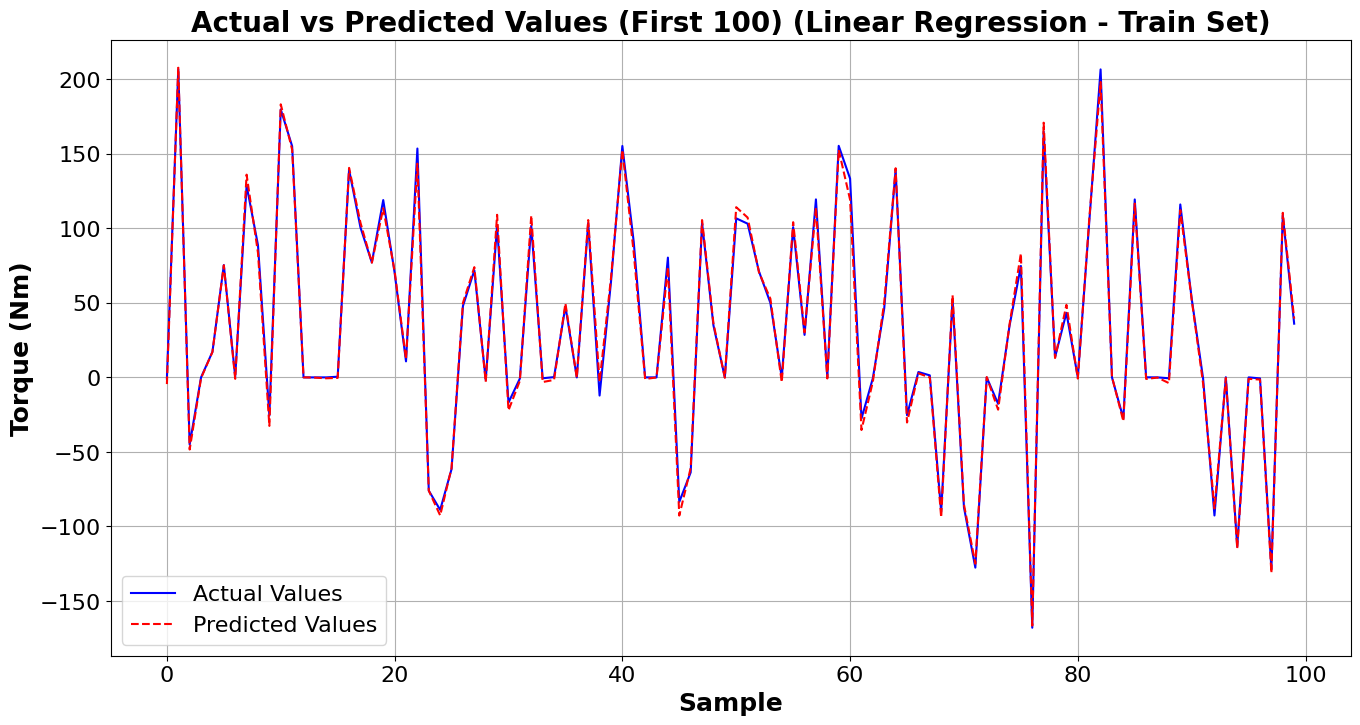

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_lr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Linear Regression - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

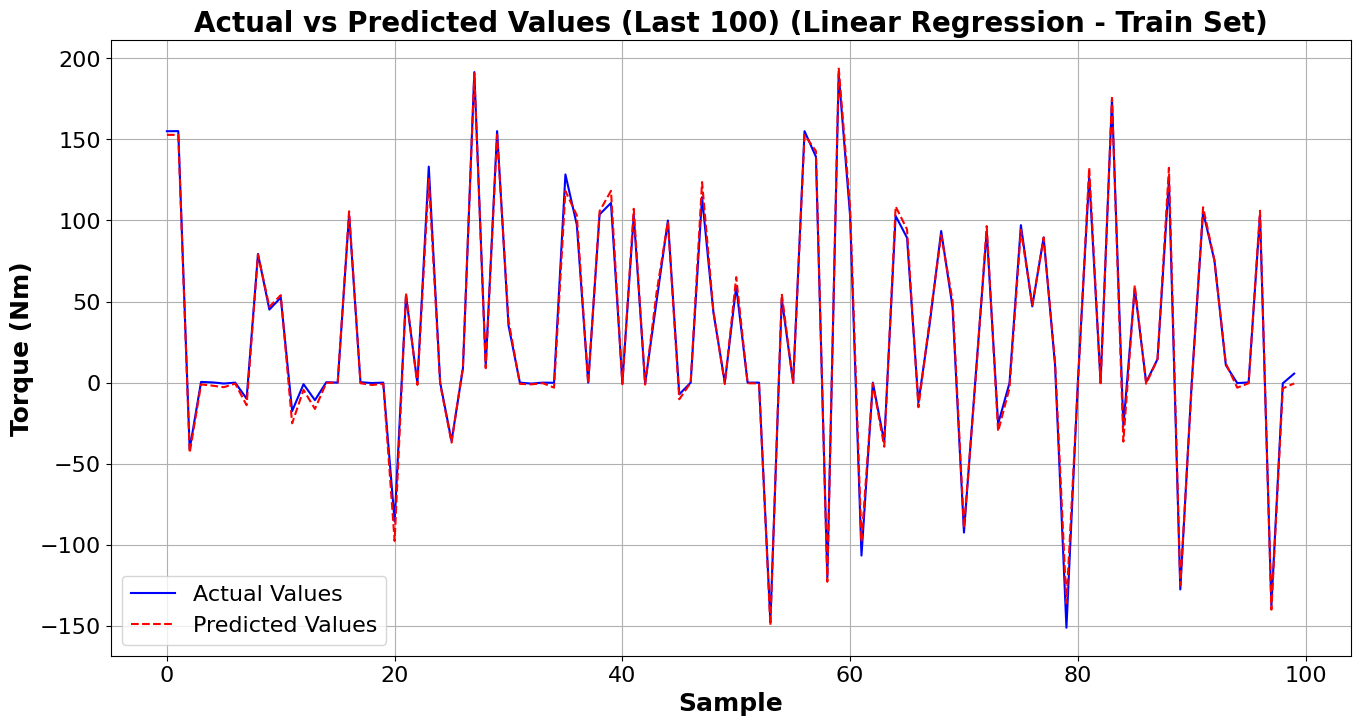

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_lr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Linear Regression - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

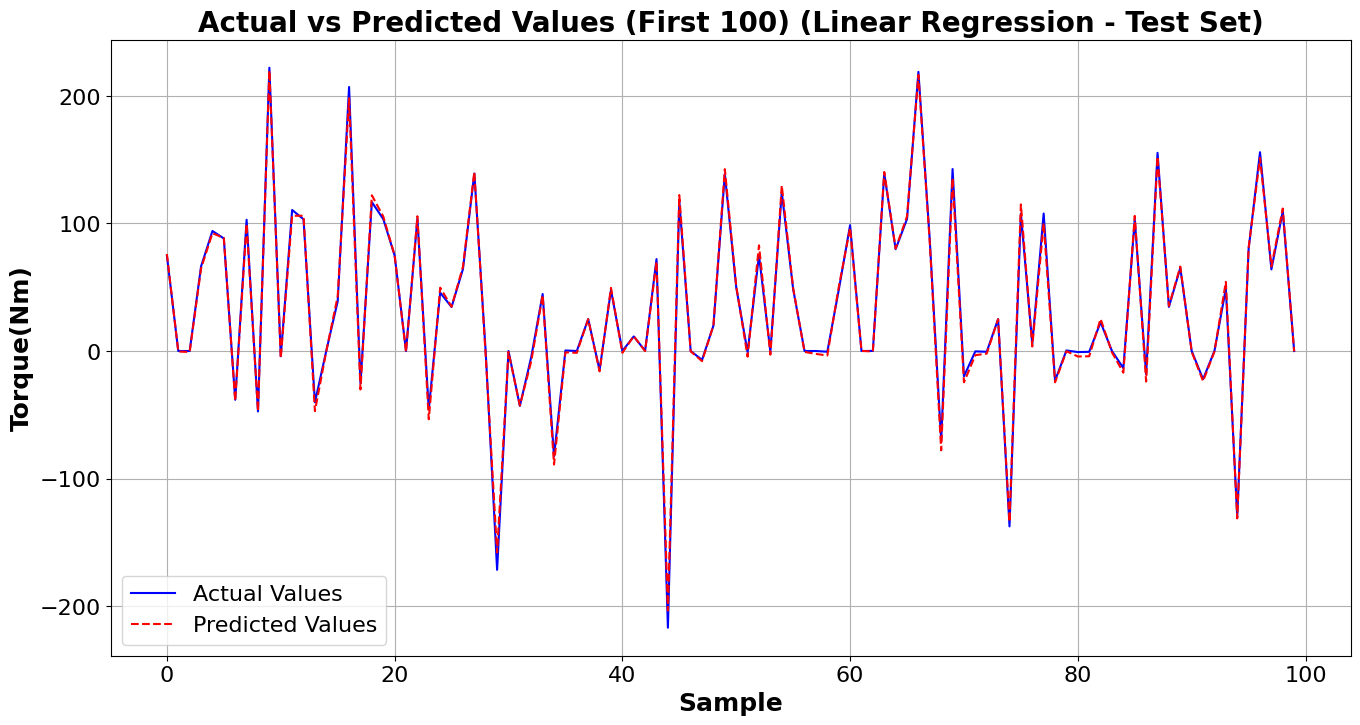

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_lr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque(Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Linear Regression - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

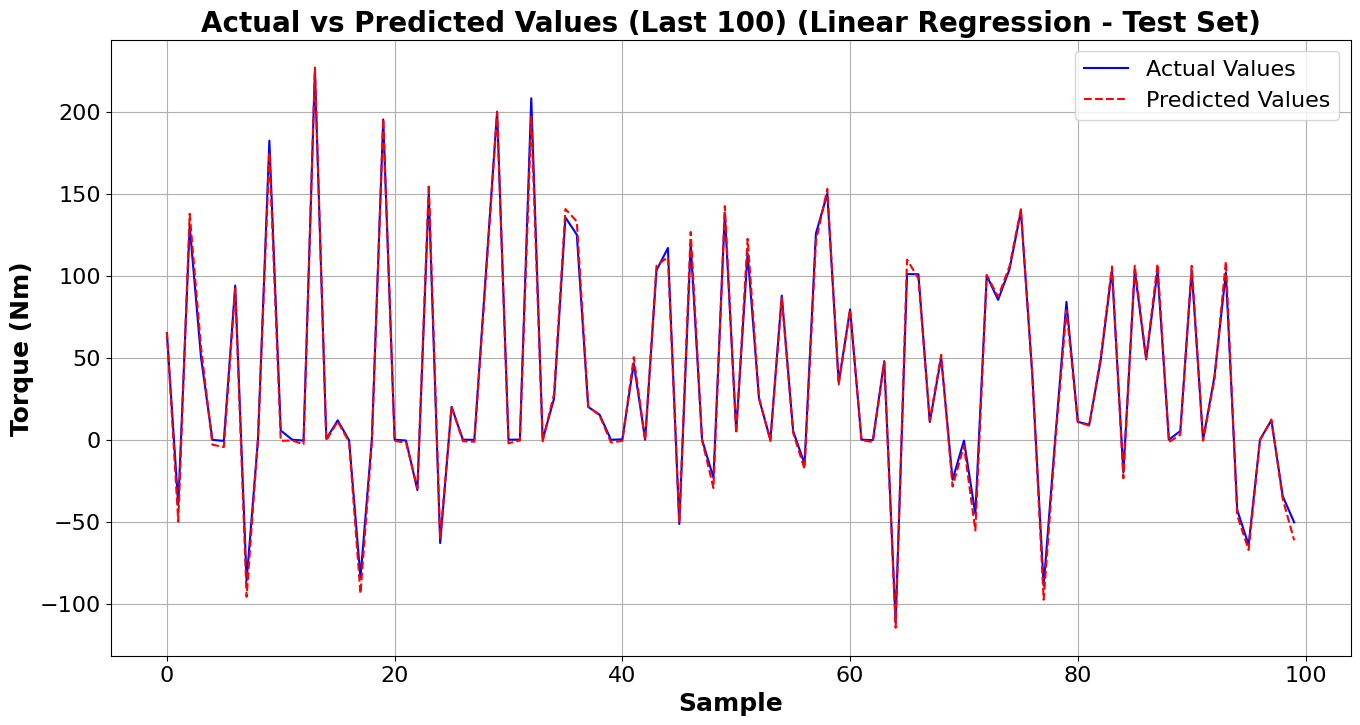

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_lr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Linear Regression - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

In [19]:
print('Coefficient and intercept for the model:')
print('Coefficients:',lr_model.coef_)
print('Intercept:',lr_model.intercept_)

Coefficient and intercept for the model:
Coefficients: [-2.09607664e-01 -5.04471886e+00 -2.96865425e+00  7.18279938e+01
 -6.54865265e-01  7.65118039e+00 -1.20736752e+01  3.78090446e-02
  5.60649046e+00 -2.61483897e-01 -1.73846097e+00]
Intercept: 31.120049162149787


In [20]:
print('Final Equation:')
print('Torque = {}*u_q + {}*u_d + {}*i_d + \n{}*i_q + {}*coolant + {}*stator_winding + \n{}*stator_tooth + {}*pm + {}*stator_yoke + \n{}*ambient + {}*speed + {}'.format(\
          round(lr_model.coef_[0],6), round(lr_model.coef_[1],6),
          round(lr_model.coef_[2],6), round(lr_model.coef_[3],6),
          round(lr_model.coef_[4],6), round(lr_model.coef_[5],6),
          round(lr_model.coef_[6],6), round(lr_model.coef_[7],6),
          round(lr_model.coef_[8],6), round(lr_model.coef_[9],6),
          round(lr_model.coef_[10],6), round(lr_model.intercept_,6))) # type: ignore

Final Equation:
Torque = -0.209608*u_q + -5.044719*u_d + -2.968654*i_d + 
71.827994*i_q + -0.654865*coolant + 7.65118*stator_winding + 
-12.073675*stator_tooth + 0.037809*pm + 5.60649*stator_yoke + 
-0.261484*ambient + -1.738461*speed + 31.120049


In [21]:
# Saving the model
joblib.dump(lr_model,'LinearRegression_Torque.pkl')

['LinearRegression_Torque.pkl']

## Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet

### Finding the Optimal Hyperparameters Using Halving Grid Search

In [23]:
# Defining the parameter grid
parameters1 = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'max_iter': [250, 500, 1000],
}

In [24]:
halving_search1 = HalvingGridSearchCV(estimator=ElasticNet(),
                                     param_grid=parameters1,
                                     cv=5,
                                     factor=2,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search1.fit(X_train_scaled, y_train)

n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 10
min_resources_: 2079
max_resources_: 1064652
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 990
n_resources: 2079
Fitting 5 folds for each of 990 candidates, totalling 4950 fits
----------
iter: 1
n_candidates: 495
n_resources: 4158
Fitting 5 folds for each of 495 candidates, totalling 2475 fits
----------
iter: 2
n_candidates: 248
n_resources: 8316
Fitting 5 folds for each of 248 candidates, totalling 1240 fits
----------
iter: 3
n_candidates: 124
n_resources: 16632
Fitting 5 folds for each of 124 candidates, totalling 620 fits
----------
iter: 4
n_candidates: 62
n_resources: 33264
Fitting 5 folds for each of 62 candidates, totalling 310 fits
----------
iter: 5
n_candidates: 31
n_resources: 66528
Fitting 5 folds for each of 31 candidates, totalling 155 fits
----------
iter: 6
n_candidates: 16
n_resources: 133056
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 7


d:\JUPYTER-LAB\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.904e+06, tolerance: 6.329e+05
  model = cd_fast.enet_coordinate_descent(


HalvingGridSearchCV(estimator=ElasticNet(), factor=2, n_jobs=-1,
                    param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                                'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                             0.7, 0.8, 0.9, 1],
                                'max_iter': [250, 500, 1000],
                                'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
                    verbose=3)

In [26]:
print('Best parameters found:', halving_search1.best_params_)

Best parameters found: {'alpha': 0.0001, 'l1_ratio': 1, 'max_iter': 1000, 'tol': 0.0001}


In [ ]:
# Creating the model with the optimal parameters
elnet_model = halving_search1.best_estimator_

y_train_pred_el = elnet_model.predict(X_train_scaled) # type: ignore
y_test_pred_el = elnet_model.predict(X_test_scaled) # type: ignore

In [ ]:
mse_train_el = mean_squared_error(y_train, y_train_pred_el)
mse_test_el = mean_squared_error(y_test, y_test_pred_el)
r2_train_el = r2_score(y_train, y_train_pred_el)
r2_test_el = r2_score(y_test, y_test_pred_el)

print('Train MSE:', round(mse_train_el, 6)) # type: ignore
print('Test MSE:', round(mse_test_el, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_el, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_el, 6)) # type: ignore

Train MSE: 20.373511
Test MSE: 20.264708
Train R2 Score: 0.996573
Test R2 Score: 0.996606


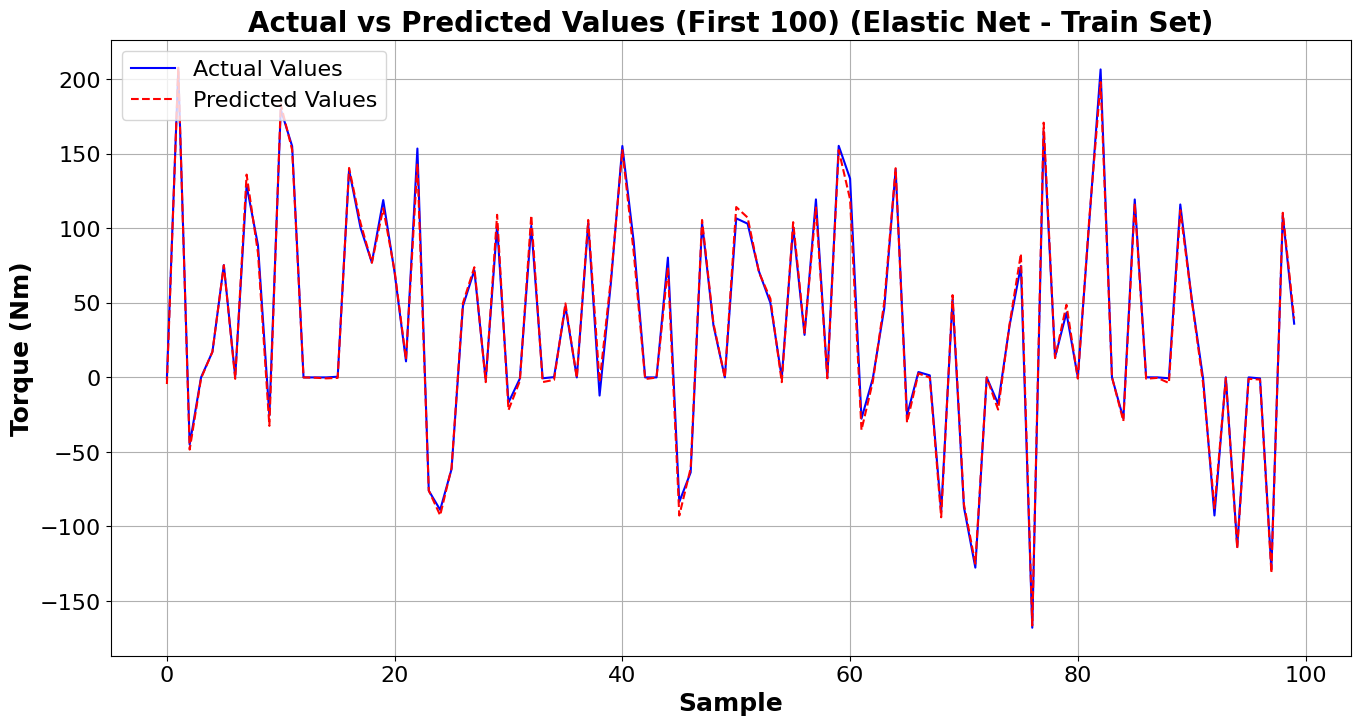

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_el[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Elastic Net - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

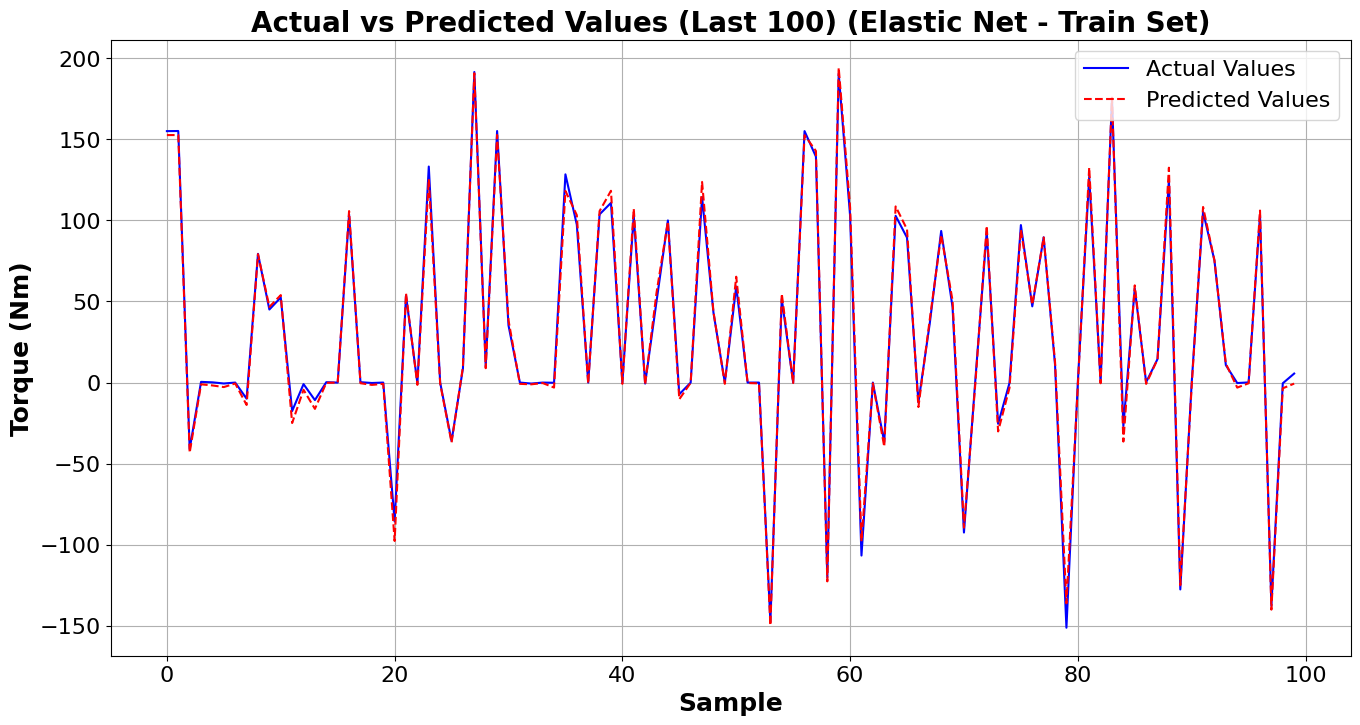

In [30]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_el[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Elastic Net - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

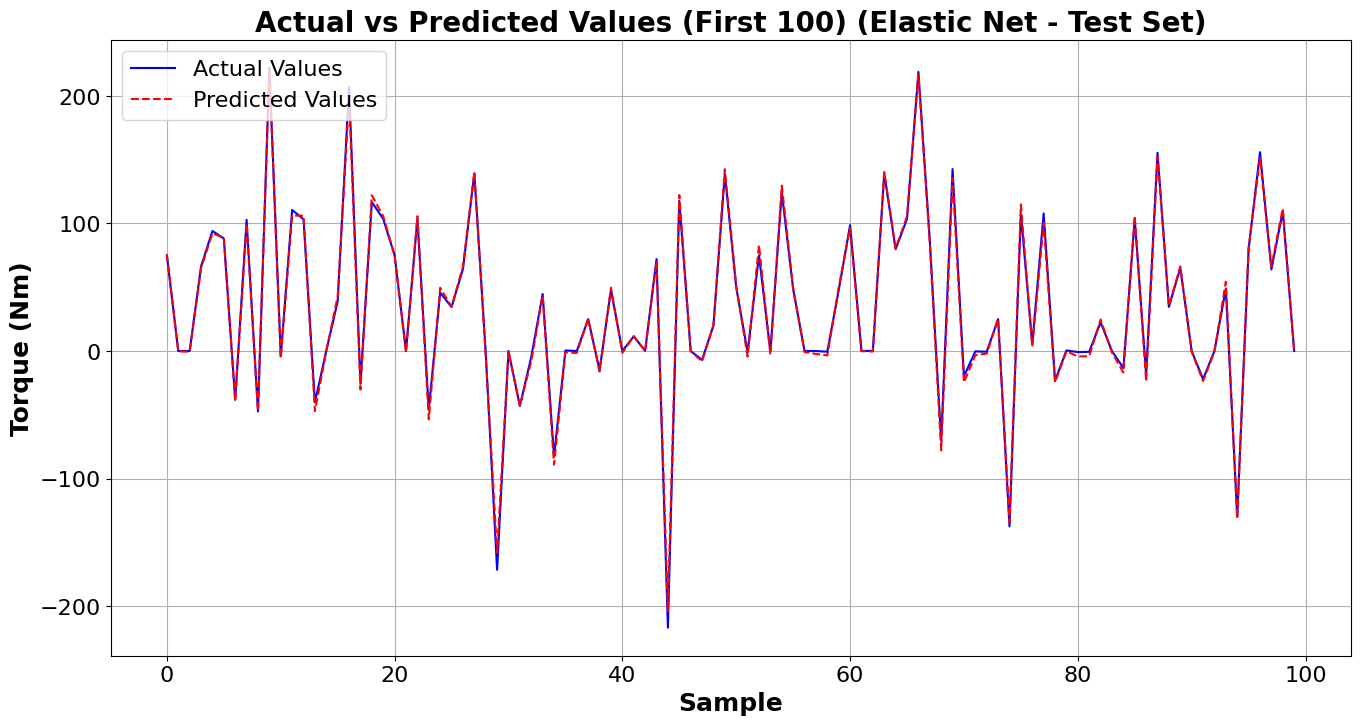

In [31]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_el[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Elastic Net - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

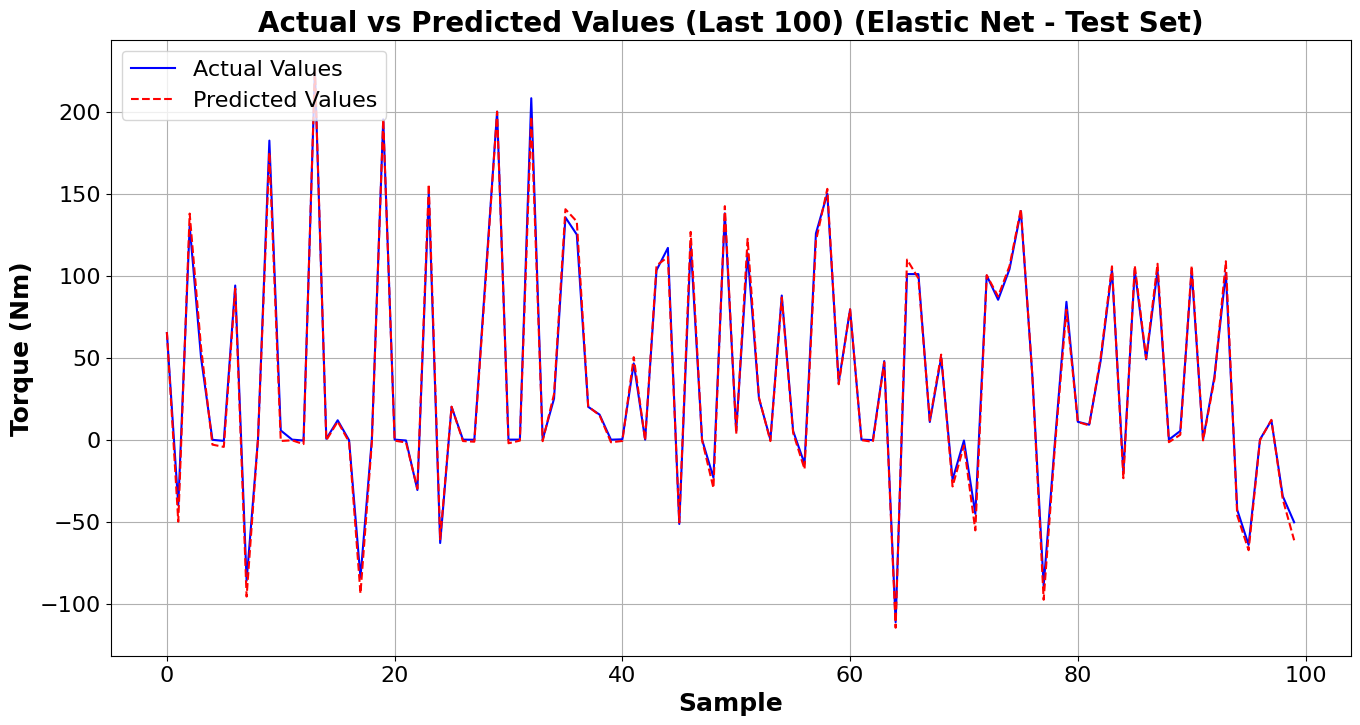

In [32]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_el[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Elastic Net - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
print('Coefficient and intercept for the model:')
print('Coefficients:',elnet_model.coef_) # type: ignore
print('Intercept:',elnet_model.intercept_) # type: ignore

Coefficient and intercept for the model:
Coefficients: [-2.01934953e-01 -5.00905225e+00 -3.06612733e+00  7.18700555e+01
 -3.37492664e-01  6.35285030e+00 -9.32970896e+00 -4.76863742e-02
  3.91113946e+00 -2.65354736e-01 -1.86146275e+00]
Intercept: 31.12004916214928


In [ ]:
print('Final Equation:')
print('Torque = {}*u_q + {}*u_d + {}*i_d + \n{}*i_q + {}*coolant + {}*stator_winding + \n{}*stator_tooth + {}*pm + {}*stator_yoke + \n{}*ambient + {}*speed + {}'.format(\
          round(elnet_model.coef_[0],6), round(elnet_model.coef_[1],6), # type: ignore
          round(elnet_model.coef_[2],6), round(elnet_model.coef_[3],6), # type: ignore
          round(elnet_model.coef_[4],6), round(elnet_model.coef_[5],6), # type: ignore
          round(elnet_model.coef_[6],6), round(elnet_model.coef_[7],6), # type: ignore
          round(elnet_model.coef_[8],6), round(elnet_model.coef_[9],6), # type: ignore
          round(elnet_model.coef_[10],6), round(elnet_model.intercept_,6))) # type: ignore

Final Equation:
Torque = -0.201935*u_q + -5.009052*u_d + -3.066127*i_d + 
71.870056*i_q + -0.337493*coolant + 6.35285*stator_winding + 
-9.329709*stator_tooth + -0.047686*pm + 3.911139*stator_yoke + 
-0.265355*ambient + -1.861463*speed + 31.120049


In [35]:
# Saving the model
joblib.dump(elnet_model,'ElasticNet_Torque.pkl')

['ElasticNet_Torque.pkl']

## Linear SVR

In [36]:
from sklearn.svm import LinearSVR

### Finding the Optimal Hyperparameters Using Halving Grid Search

In [37]:
# Defining the parameter grid
parameters2 = {
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [250, 500, 1000]
}

In [38]:
halving_search2 = HalvingGridSearchCV(estimator=LinearSVR(),
                                     param_grid=parameters2,
                                     cv=5,
                                     factor=2,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search2.fit(X_train_scaled, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 16635
max_resources_: 1064652
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 90
n_resources: 16635
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 1
n_candidates: 45
n_resources: 33270
Fitting 5 folds for each of 45 candidates, totalling 225 fits


d:\JUPYTER-LAB\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 2
n_candidates: 23
n_resources: 66540
Fitting 5 folds for each of 23 candidates, totalling 115 fits
----------
iter: 3
n_candidates: 12
n_resources: 133080
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 6
n_resources: 266160
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 5
n_candidates: 3
n_resources: 532320
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 6
n_candidates: 2
n_resources: 1064640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


d:\JUPYTER-LAB\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


HalvingGridSearchCV(estimator=LinearSVR(), factor=2, n_jobs=-1,
                    param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                'max_iter': [250, 500, 1000],
                                'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
                    verbose=3)

In [39]:
print('Best parameters found:', halving_search2.best_params_)

Best parameters found: {'C': 10, 'max_iter': 500, 'tol': 0.0001}


In [ ]:
# Creating the model with the optimal parameters
lsvr_model = halving_search2.best_estimator_

y_train_pred_lsvr = lsvr_model.predict(X_train_scaled) # type: ignore
y_test_pred_lsvr = lsvr_model.predict(X_test_scaled) # type: ignore

In [ ]:
mse_train_lsvr = mean_squared_error(y_train, y_train_pred_lsvr)
mse_test_lsvr = mean_squared_error(y_test, y_test_pred_lsvr)
r2_train_lsvr = r2_score(y_train, y_train_pred_lsvr)
r2_test_lsvr = r2_score(y_test, y_test_pred_lsvr)

print('Train MSE:', round(mse_train_lsvr, 6)) # type: ignore
print('Test MSE:', round(mse_test_lsvr, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_lsvr, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_lsvr, 6)) # type: ignore

Train MSE: 25.527934
Test MSE: 25.450249
Train R2 Score: 0.995706
Test R2 Score: 0.995737


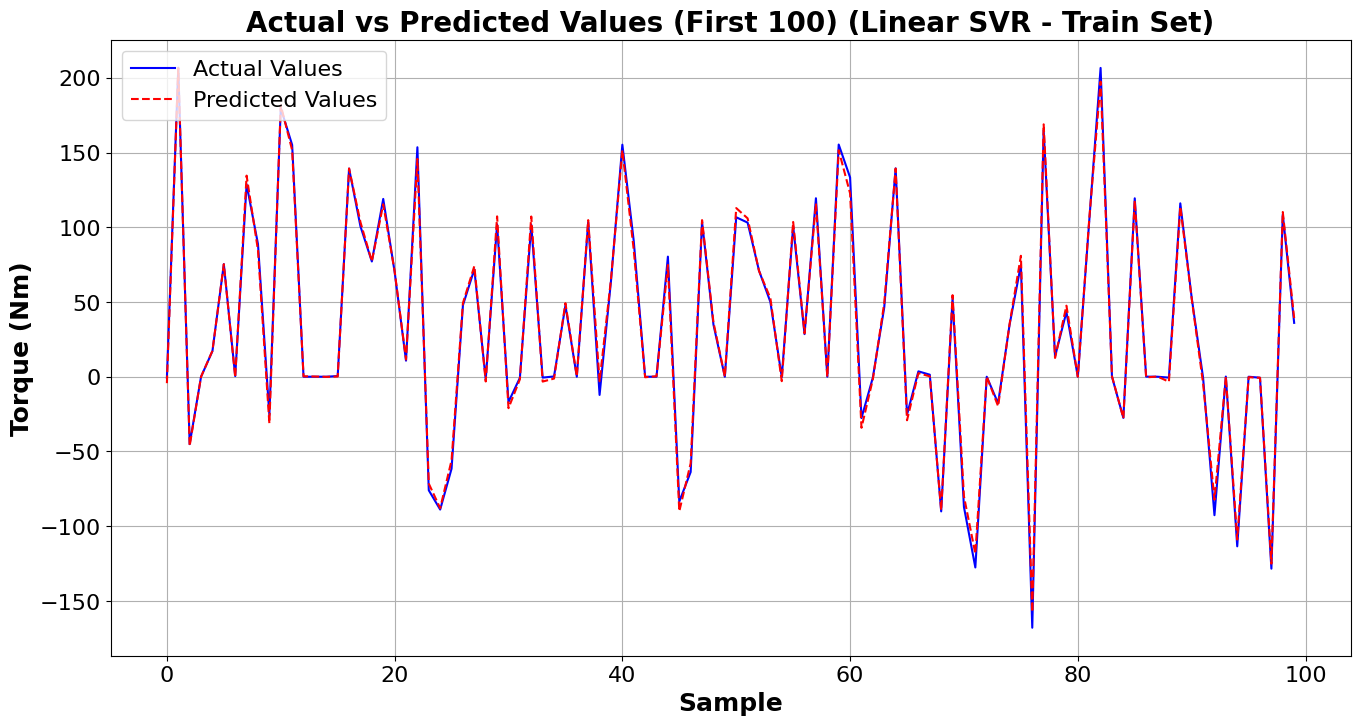

In [42]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_lsvr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Linear SVR - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

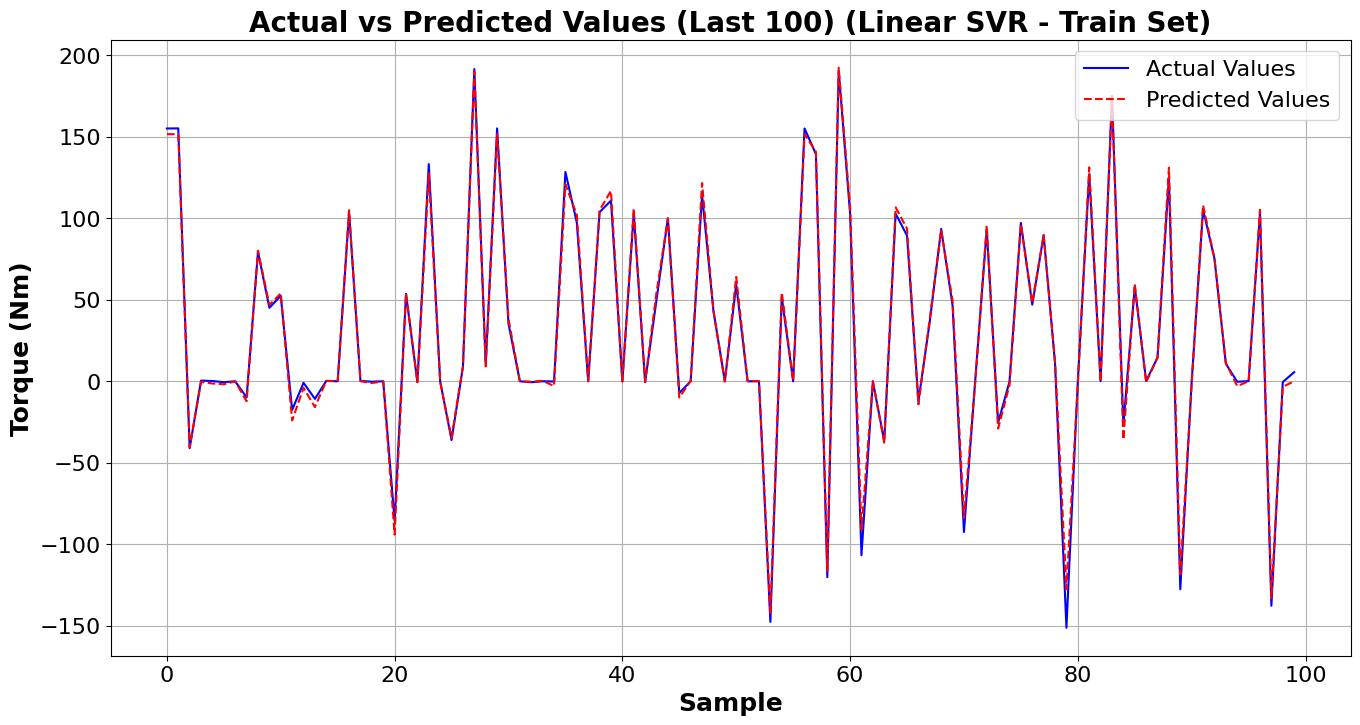

In [43]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_lsvr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Linear SVR - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

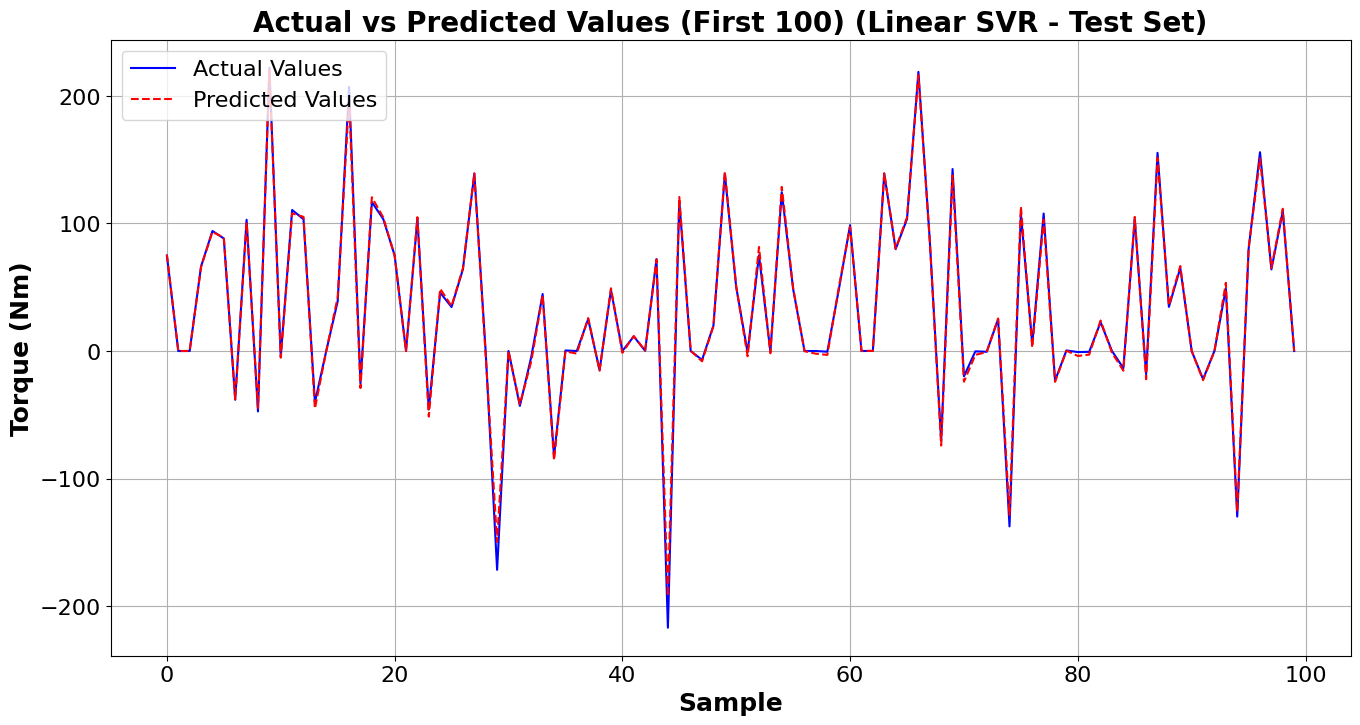

In [44]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_lsvr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Linear SVR - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

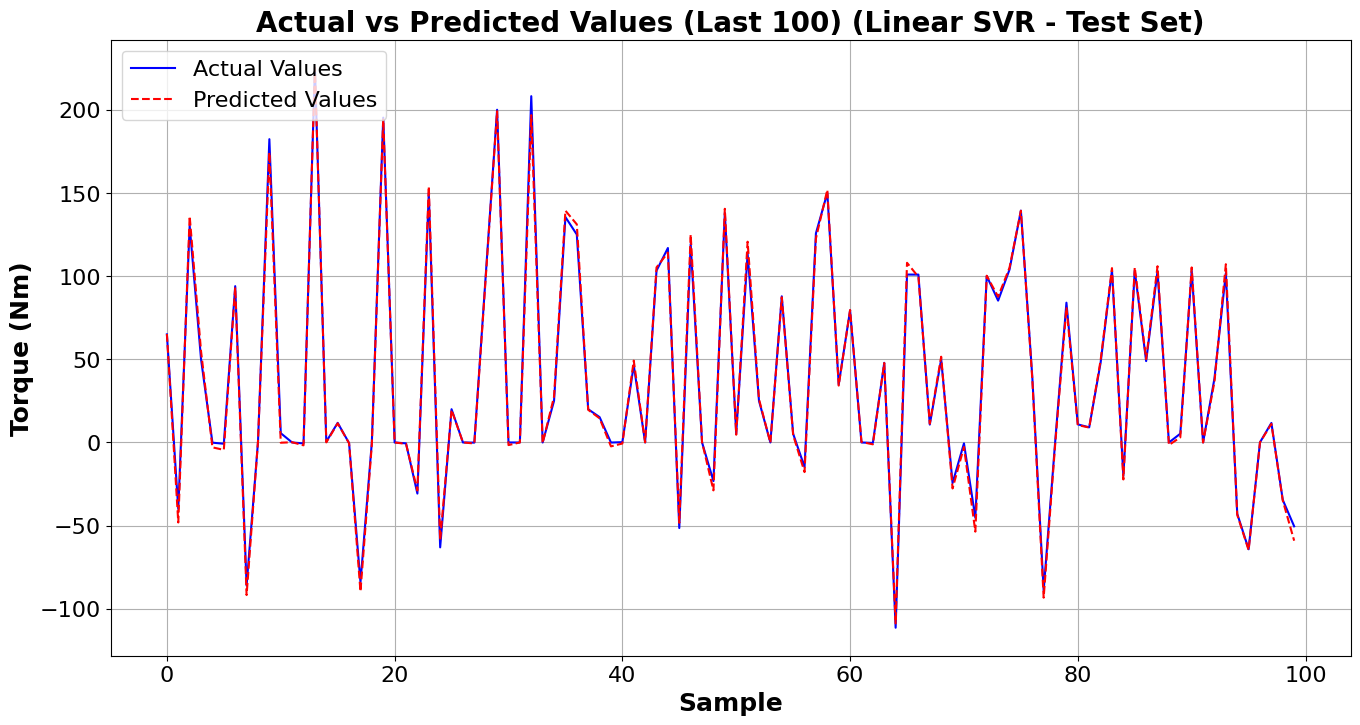

In [45]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_lsvr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Linear SVR - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
print('Coefficient and intercept for the model:')
print('Coefficients:',lsvr_model.coef_) # type: ignore
print('Intercept:',lsvr_model.intercept_) # type: ignore

Coefficient and intercept for the model:
Coefficients: [ 1.11312492e+00 -4.92895220e+00 -6.63013549e+00  6.96774445e+01
 -5.26879022e-01  2.52112640e+00 -4.24242966e+00 -2.16987225e-01
  2.40551113e+00 -7.92819354e-03 -5.19653562e+00]
Intercept: [31.76150372]


In [ ]:
print('Final Equation:')
print('Torque = {}*u_q + {}*u_d + {}*i_d + \n{}*i_q + {}*coolant + {}*stator_winding + \n{}*stator_tooth + {}*pm + {}*stator_yoke + \n{}*ambient + {}*speed + {}'.format(\
          round(lsvr_model.coef_[0],6), round(lsvr_model.coef_[1],6), # type: ignore
          round(lsvr_model.coef_[2],6), round(lsvr_model.coef_[3],6), # type: ignore
          round(lsvr_model.coef_[4],6), round(lsvr_model.coef_[5],6), # type: ignore
          round(lsvr_model.coef_[6],6), round(lsvr_model.coef_[7],6), # type: ignore
          round(lsvr_model.coef_[8],6), round(lsvr_model.coef_[9],6), # type: ignore
          round(lsvr_model.coef_[10],6), round(lsvr_model.intercept_[0],6))) # type: ignore

Final Equation:
Torque = 1.113125*u_q + -4.928952*u_d + -6.630135*i_d + 
69.677444*i_q + -0.526879*coolant + 2.521126*stator_winding + 
-4.24243*stator_tooth + -0.216987*pm + 2.405511*stator_yoke + 
-0.007928*ambient + -5.196536*speed + 31.761504


In [48]:
# Saving the model
joblib.dump(lsvr_model,'LinearSVR_Torque.pkl')

['LinearSVR_Torque.pkl']

## Decision Tree Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

### Finding the Optimal Hyperparameters Using Halving Grid Search

In [12]:
# Defining the parameter grid
parameters3 = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 20, 40, 80, 100],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [13]:
halving_search3 = HalvingGridSearchCV(estimator=DecisionTreeRegressor(),
                                     param_grid=parameters3,
                                     cv=5,
                                     factor=2,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search3.fit(X_train_scaled, y_train)

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 4158
max_resources_: 1064652
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 300
n_resources: 4158
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 150
n_resources: 8316
Fitting 5 folds for each of 150 candidates, totalling 750 fits
----------
iter: 2
n_candidates: 75
n_resources: 16632
Fitting 5 folds for each of 75 candidates, totalling 375 fits
----------
iter: 3
n_candidates: 38
n_resources: 33264
Fitting 5 folds for each of 38 candidates, totalling 190 fits
----------
iter: 4
n_candidates: 19
n_resources: 66528
Fitting 5 folds for each of 19 candidates, totalling 95 fits
----------
iter: 5
n_candidates: 10
n_resources: 133056
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 6
n_candidates: 5
n_resources: 266112
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 7
n_candidate

HalvingGridSearchCV(estimator=DecisionTreeRegressor(), factor=2, n_jobs=-1,
                    param_grid={'criterion': ['squared_error', 'friedman_mse',
                                              'absolute_error'],
                                'max_depth': [None, 20, 40, 80, 100],
                                'min_samples_leaf': [1, 2, 4, 8, 16],
                                'min_samples_split': [2, 4, 8, 16]},
                    verbose=3)

In [14]:
print('Best parameters found:', halving_search3.best_params_)

Best parameters found: {'criterion': 'friedman_mse', 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Creating the model with the optimal parameters
dt_model = halving_search3.best_estimator_

y_train_pred_dt = dt_model.predict(X_train_scaled) # type: ignore
y_test_pred_dt = dt_model.predict(X_test_scaled) # type: ignore

In [ ]:
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

print('Train MSE:', round(mse_train_dt, 6)) # type: ignore
print('Test MSE:', round(mse_test_dt, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_dt, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_dt, 6)) # type: ignore

Train MSE: 0.142327
Test MSE: 0.867584
Train R2 Score: 0.999976
Test R2 Score: 0.999855


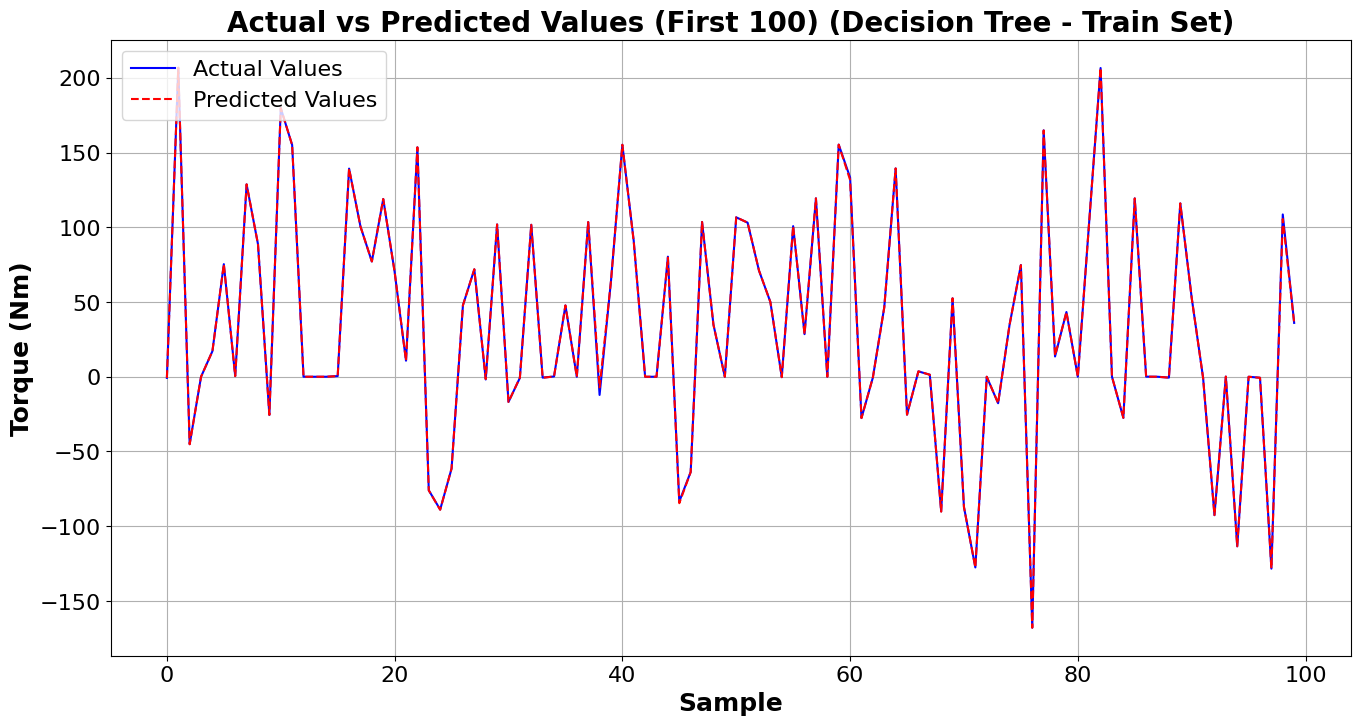

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_dt[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Decision Tree - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

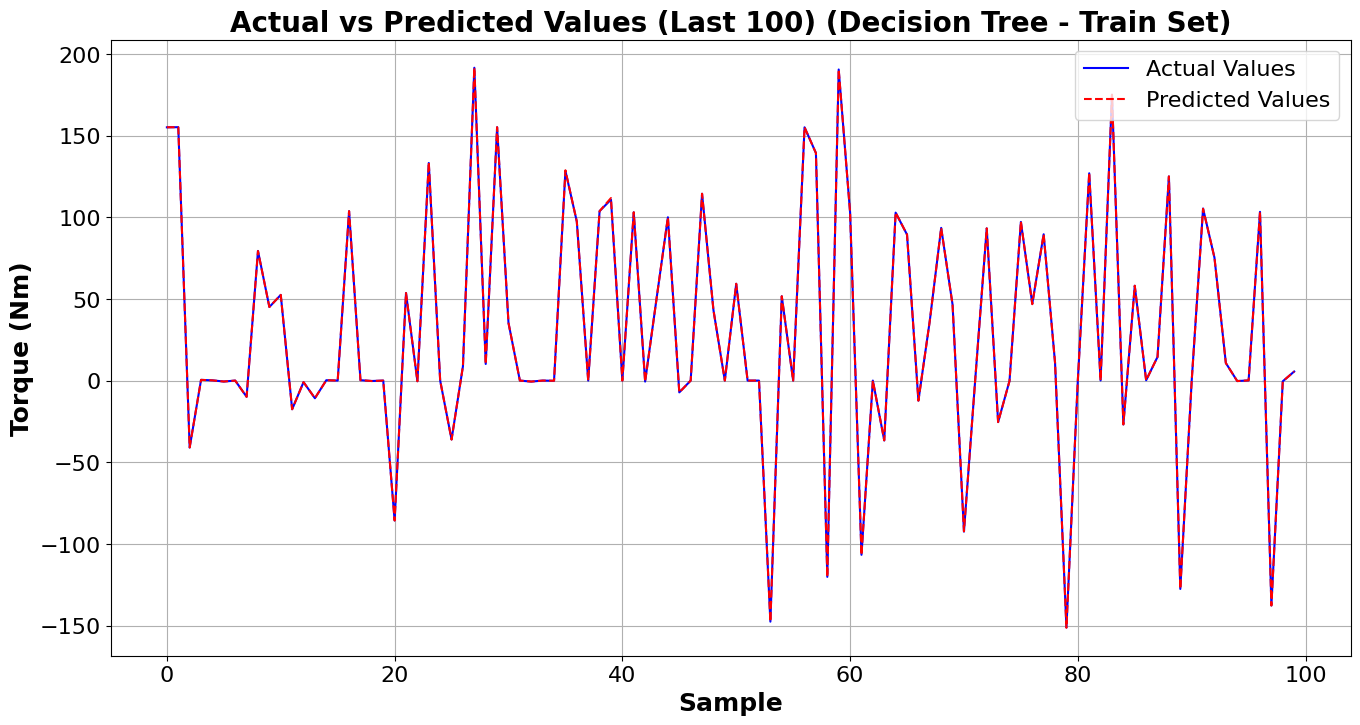

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_dt[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Decision Tree - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

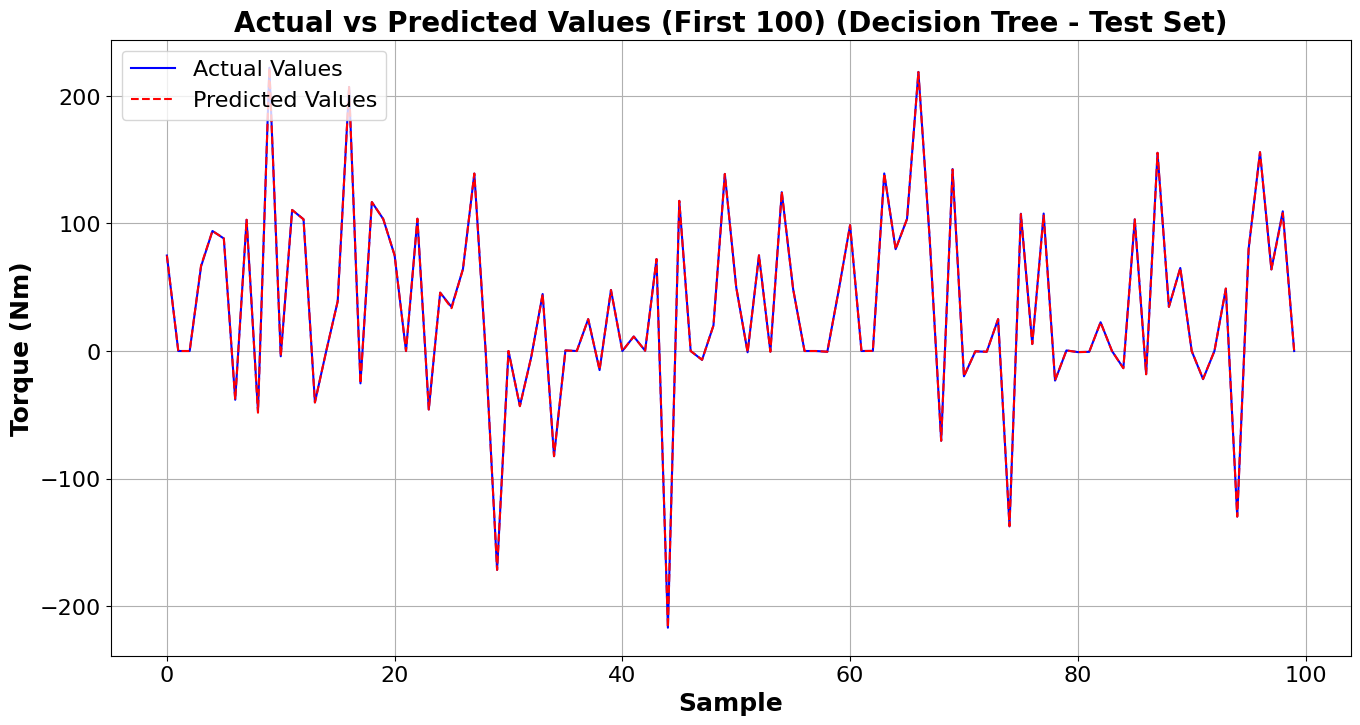

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_dt[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Decision Tree - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

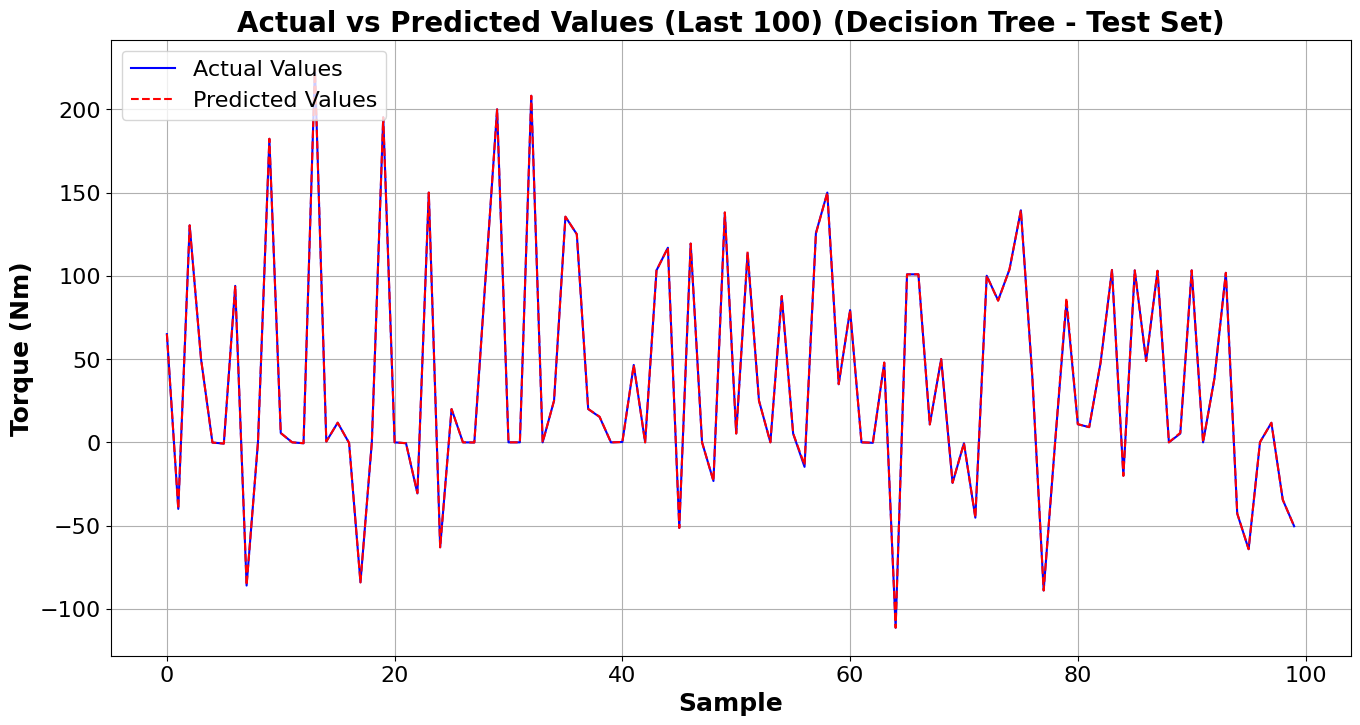

In [20]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_dt[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Decision Tree - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

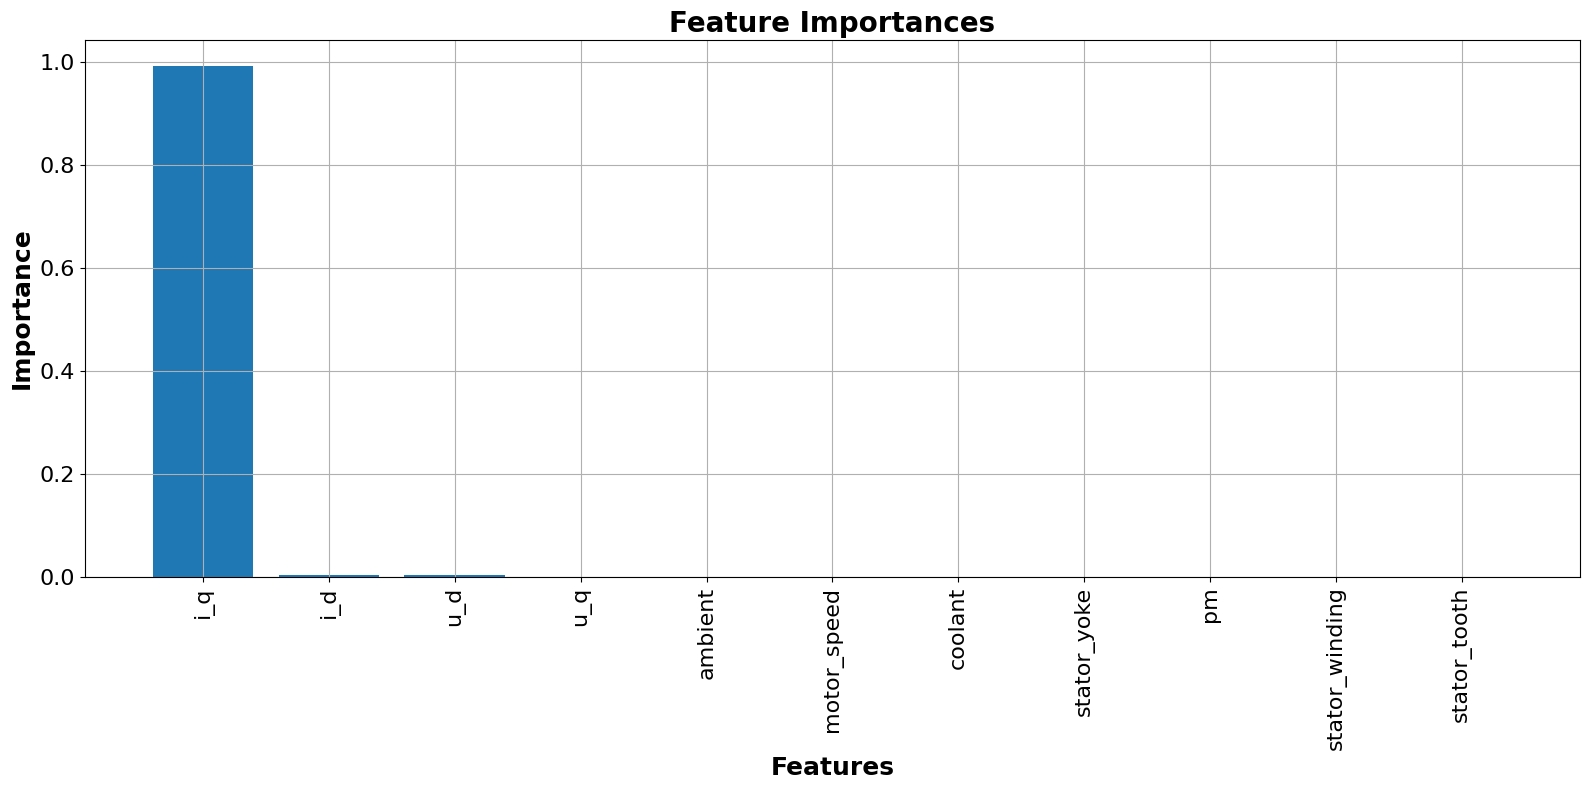

In [ ]:
feature_names = ['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 
         'pm', 'stator_yoke', 'ambient', 'motor_speed'] 
importances = dt_model.feature_importances_ # type: ignore

indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(16, 8))
plt.title('Feature Importances', fontsize = 20, fontweight = 'bold')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90, fontsize = 16) # type: ignore
plt.yticks(fontsize = 16)
plt.xlabel('Features', fontsize = 18, weight = 'bold')
plt.ylabel('Importance', fontsize = 18, weight = 'bold')
plt.tight_layout()
plt.grid(True)
plt.show()

In [22]:
# Saving the model
joblib.dump(dt_model,'DecisionTree_Torque.pkl')

['DecisionTree_Torque.pkl']

## Bayesian Ridge Regression

In [11]:
from sklearn.linear_model import BayesianRidge

### Finding the Optimal Hyperparameters Using Halving Grid Search

In [12]:
# Defining the parameter grid
parameters4 = {
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'alpha_1': [1e-1, 1e-2, 1e-3, 1e-6],
    'alpha_2': [1e-1, 1e-2, 1e-3, 1e-6],
    'lambda_1': [1e-1, 1e-2, 1e-3, 1e-6],
    'lambda_2': [1e-1, 1e-2, 1e-3, 1e-6]
}

In [13]:
halving_search4 = HalvingGridSearchCV(estimator=BayesianRidge(),
                                     param_grid=parameters4,
                                     cv=5,
                                     factor=2,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search4.fit(X_train_scaled, y_train)

n_iterations: 13
n_required_iterations: 13
n_possible_iterations: 13
min_resources_: 259
max_resources_: 1064652
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 6400
n_resources: 259
Fitting 5 folds for each of 6400 candidates, totalling 32000 fits
----------
iter: 1
n_candidates: 3200
n_resources: 518
Fitting 5 folds for each of 3200 candidates, totalling 16000 fits
----------
iter: 2
n_candidates: 1600
n_resources: 1036
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
----------
iter: 3
n_candidates: 800
n_resources: 2072
Fitting 5 folds for each of 800 candidates, totalling 4000 fits
----------
iter: 4
n_candidates: 400
n_resources: 4144
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 5
n_candidates: 200
n_resources: 8288
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
----------
iter: 6
n_candidates: 100
n_resources: 16576
Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------

HalvingGridSearchCV(estimator=BayesianRidge(), factor=2, n_jobs=-1,
                    param_grid={'alpha_1': [0.1, 0.01, 0.001, 1e-06],
                                'alpha_2': [0.1, 0.01, 0.001, 1e-06],
                                'lambda_1': [0.1, 0.01, 0.001, 1e-06],
                                'lambda_2': [0.1, 0.01, 0.001, 1e-06],
                                'max_iter': [100, 200, 300, 400, 500],
                                'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
                    verbose=3)

In [14]:
print('Best parameters found:', halving_search4.best_params_)

Best parameters found: {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 0.001, 'lambda_2': 0.001, 'max_iter': 100, 'tol': 0.1}


In [ ]:
# Creating the model with the optimal parameters
br_model = halving_search4.best_estimator_

y_train_pred_br = br_model.predict(X_train_scaled) # type: ignore
y_test_pred_br = br_model.predict(X_test_scaled) # type: ignore

In [ ]:
mse_train_br = mean_squared_error(y_train, y_train_pred_br)
mse_test_br = mean_squared_error(y_test, y_test_pred_br)
r2_train_br = r2_score(y_train, y_train_pred_br)
r2_test_br = r2_score(y_test, y_test_pred_br)

print('Train MSE:', round(mse_train_br, 6)) # type: ignore
print('Test MSE:', round(mse_test_br, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_br, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_br, 6)) # type: ignore

Train MSE: 20.365407
Test MSE: 20.259357
Train R2 Score: 0.996574
Test R2 Score: 0.996606


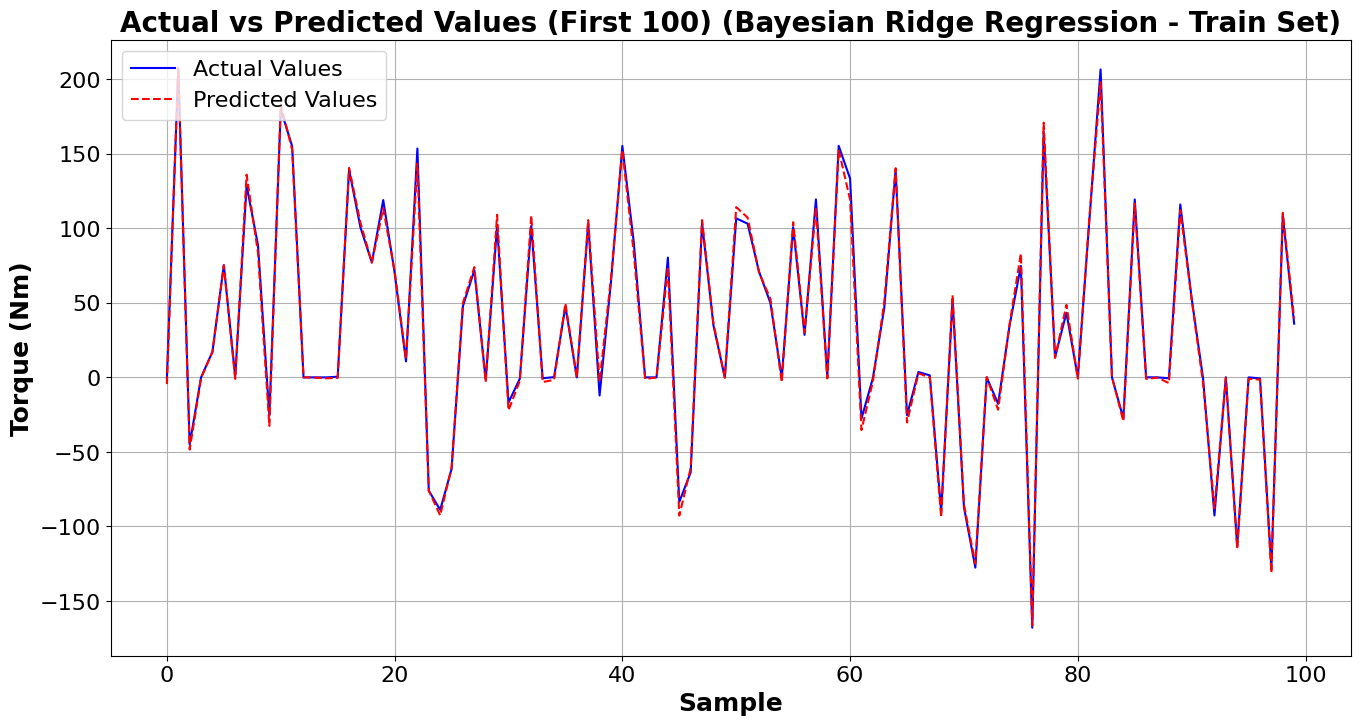

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_br[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Bayesian Ridge Regression - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

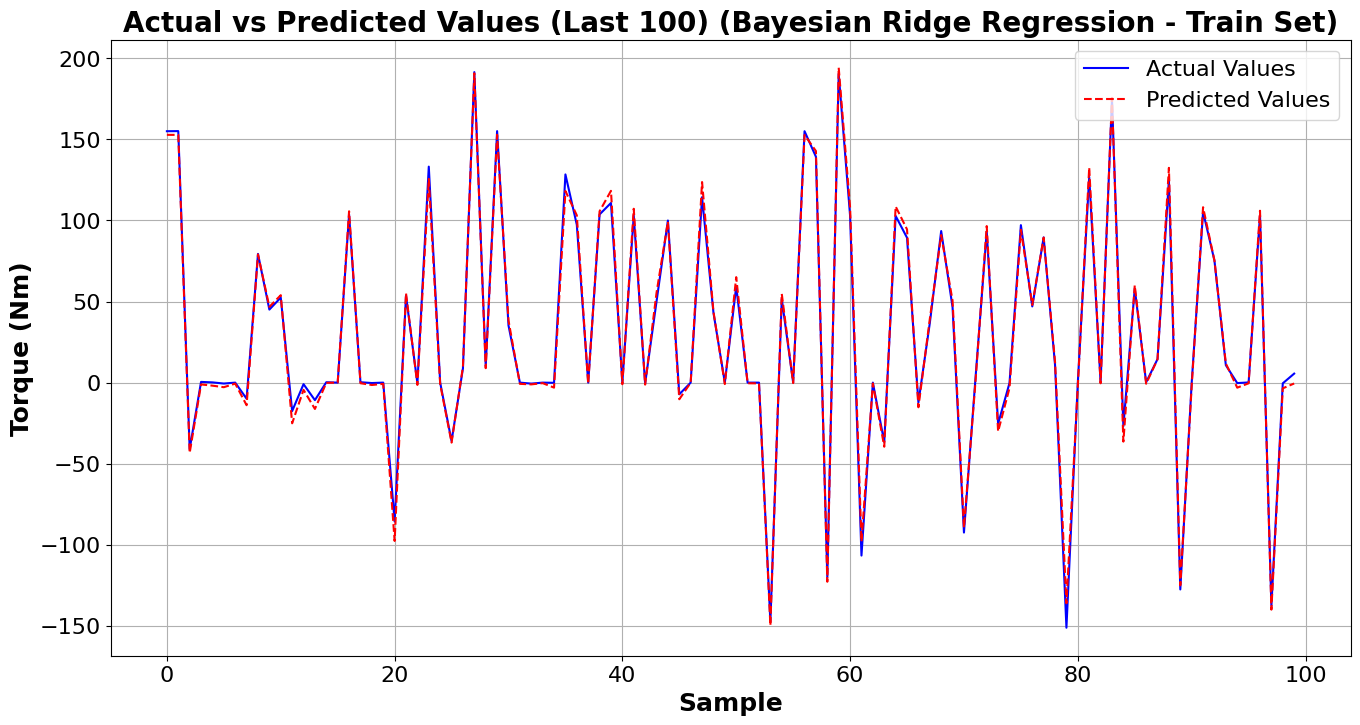

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_br[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Bayesian Ridge Regression - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

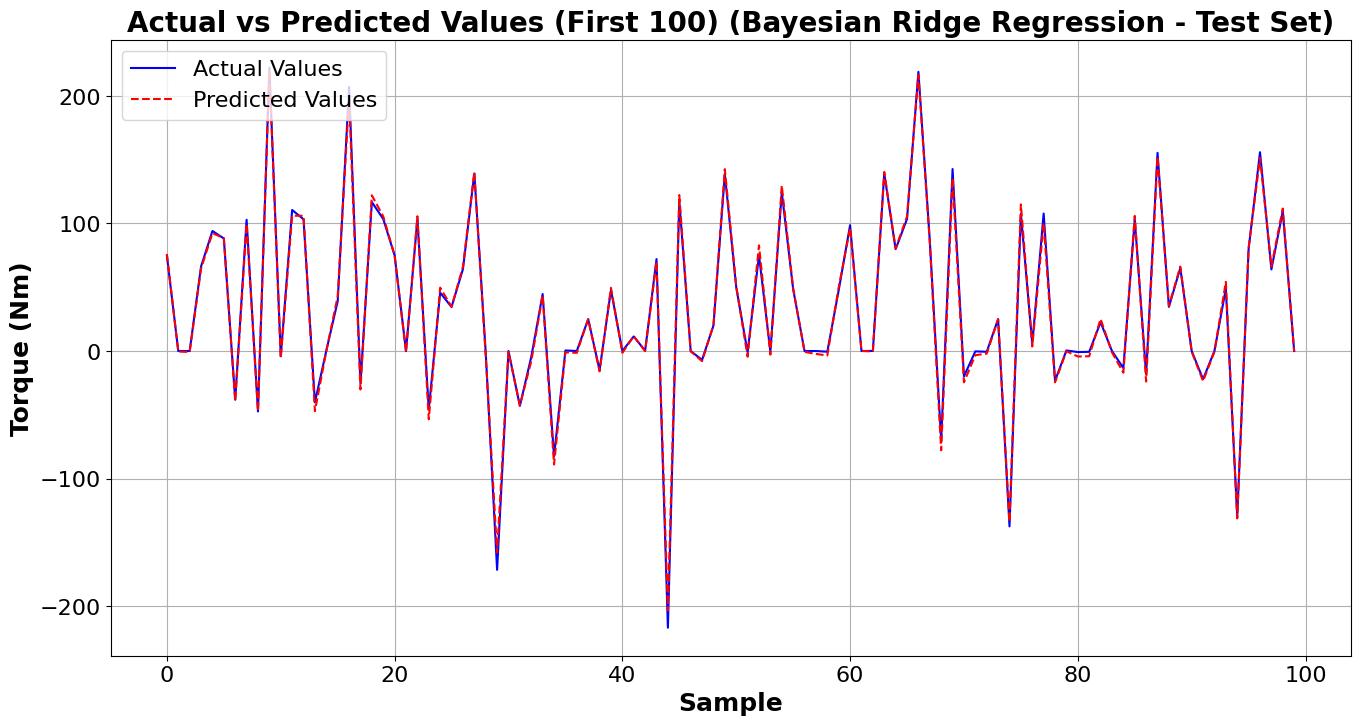

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_br[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Bayesian Ridge Regression - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

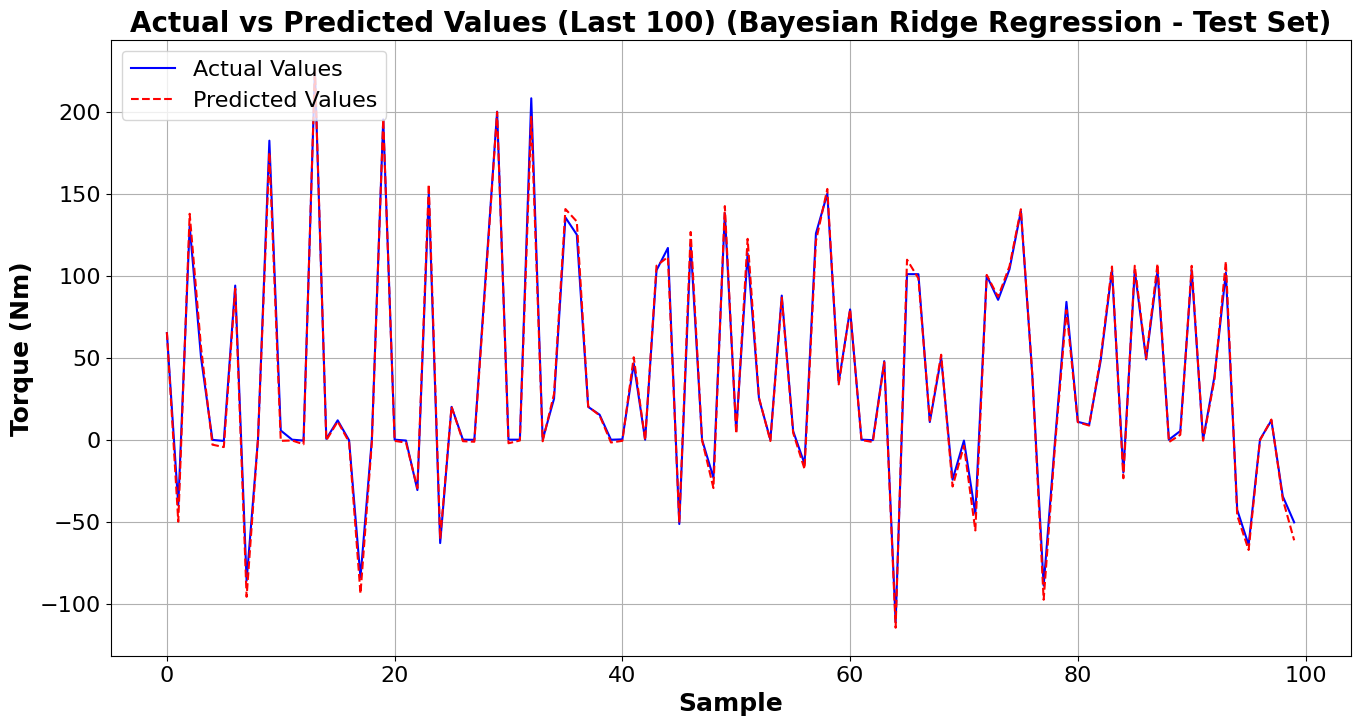

In [20]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_br[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Bayesian Ridge Regression - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
print('Coefficient and intercept for the model:')
print('Coefficients:',br_model.coef_) # type: ignore
print('Intercept:',br_model.intercept_) # type: ignore

Coefficient and intercept for the model:
Coefficients: [-2.09602014e-01 -5.04471757e+00 -2.96867768e+00  7.18279941e+01
 -6.54780603e-01  7.65088589e+00 -1.20730186e+01  3.77856236e-02
  5.60606509e+00 -2.61484452e-01 -1.73849653e+00]
Intercept: 31.120049162149787


In [ ]:
print('Final Equation:')
print('Torque = {}*u_q + {}*u_d + {}*i_d + \n{}*i_q + {}*coolant + {}*stator_winding + \n{}*stator_tooth + {}*pm + {}*stator_yoke + \n{}*ambient + {}*speed + {}'.format(\
          round(br_model.coef_[0],6), round(br_model.coef_[1],6), # type: ignore
          round(br_model.coef_[2],6), round(br_model.coef_[3],6), # type: ignore
          round(br_model.coef_[4],6), round(br_model.coef_[5],6), # type: ignore
          round(br_model.coef_[6],6), round(br_model.coef_[7],6), # type: ignore
          round(br_model.coef_[8],6), round(br_model.coef_[9],6), # type: ignore
          round(br_model.coef_[10],6), round(br_model.intercept_,6))) # type: ignore

Final Equation:
Torque = -0.209602*u_q + -5.044718*u_d + -2.968678*i_d + 
71.827994*i_q + -0.654781*coolant + 7.650886*stator_winding + 
-12.073019*stator_tooth + 0.037786*pm + 5.606065*stator_yoke + 
-0.261484*ambient + -1.738497*speed + 31.120049


In [23]:
# Saving the model
joblib.dump(br_model,'BayesianRidge_Torque.pkl')

['BayesianRidge_Torque.pkl']

## SGD Regressor

In [11]:
from sklearn.linear_model import SGDRegressor

### Finding the Optimal Hyperparameters Using Halving Grid Search

In [16]:
# Defining the parameter grid
parameters5 = {
    'alpha': [0.0001, 0.001, 0.01, 0.01, 1],
    'max_iter': [250, 500, 1000],
    'tol': [1e-1, 1e-2, 1e-3, 1e-6],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.1, 0.01, 0.001, 0.0001],
    'power_t': [0.25, 0.5, 0.75, 1, 2.5, 5],
    'early_stopping': [False, True],
}

In [17]:
halving_search5 = HalvingGridSearchCV(estimator=SGDRegressor(),
                                     param_grid=parameters5,
                                     cv=5,
                                     factor=2,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search5.fit(X_train_scaled, y_train)

n_iterations: 14
n_required_iterations: 14
n_possible_iterations: 14
min_resources_: 129
max_resources_: 1064652
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 11520
n_resources: 129
Fitting 5 folds for each of 11520 candidates, totalling 57600 fits
----------
iter: 1
n_candidates: 5760
n_resources: 258
Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
----------
iter: 2
n_candidates: 2880
n_resources: 516
Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


d:\Python\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 3
n_candidates: 1440
n_resources: 1032
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
----------
iter: 4
n_candidates: 720
n_resources: 2064
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
----------
iter: 5
n_candidates: 360
n_resources: 4128
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
----------
iter: 6
n_candidates: 180
n_resources: 8256
Fitting 5 folds for each of 180 candidates, totalling 900 fits
----------
iter: 7
n_candidates: 90
n_resources: 16512
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 8
n_candidates: 45
n_resources: 33024
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 9
n_candidates: 23
n_resources: 66048
Fitting 5 folds for each of 23 candidates, totalling 115 fits
----------
iter: 10
n_candidates: 12
n_resources: 132096
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 11
n_candidates: 6
n_resources: 26419

HalvingGridSearchCV(estimator=SGDRegressor(), factor=2, n_jobs=-1,
                    param_grid={'alpha': [0.0001, 0.001, 0.01, 0.01, 1],
                                'early_stopping': [False, True],
                                'eta0': [0.1, 0.01, 0.001, 0.0001],
                                'learning_rate': ['constant', 'optimal',
                                                  'invscaling', 'adaptive'],
                                'max_iter': [250, 500, 1000],
                                'power_t': [0.25, 0.5, 0.75, 1, 2.5, 5],
                                'tol': [0.1, 0.01, 0.001, 1e-06]},
                    verbose=3)

In [18]:
print('Best parameters found:', halving_search5.best_params_)

Best parameters found: {'alpha': 0.0001, 'early_stopping': False, 'eta0': 0.1, 'learning_rate': 'adaptive', 'max_iter': 250, 'power_t': 1, 'tol': 1e-06}


In [ ]:
# Creating the model with the optimal parameters
sgdr_model = halving_search5.best_estimator_

y_train_pred_sgdr = sgdr_model.predict(X_train_scaled) # type: ignore
y_test_pred_sgdr = sgdr_model.predict(X_test_scaled) # type: ignore

In [ ]:
mse_train_sgdr = mean_squared_error(y_train, y_train_pred_sgdr)
mse_test_sgdr = mean_squared_error(y_test, y_test_pred_sgdr)
r2_train_sgdr = r2_score(y_train, y_train_pred_sgdr)
r2_test_sgdr = r2_score(y_test, y_test_pred_sgdr)

print('Train MSE:', round(mse_train_sgdr, 6)) # type: ignore
print('Test MSE:', round(mse_test_sgdr, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_sgdr, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_sgdr, 6)) # type: ignore

Train MSE: 20.36786
Test MSE: 20.26058
Train R2 Score: 0.996574
Test R2 Score: 0.996606


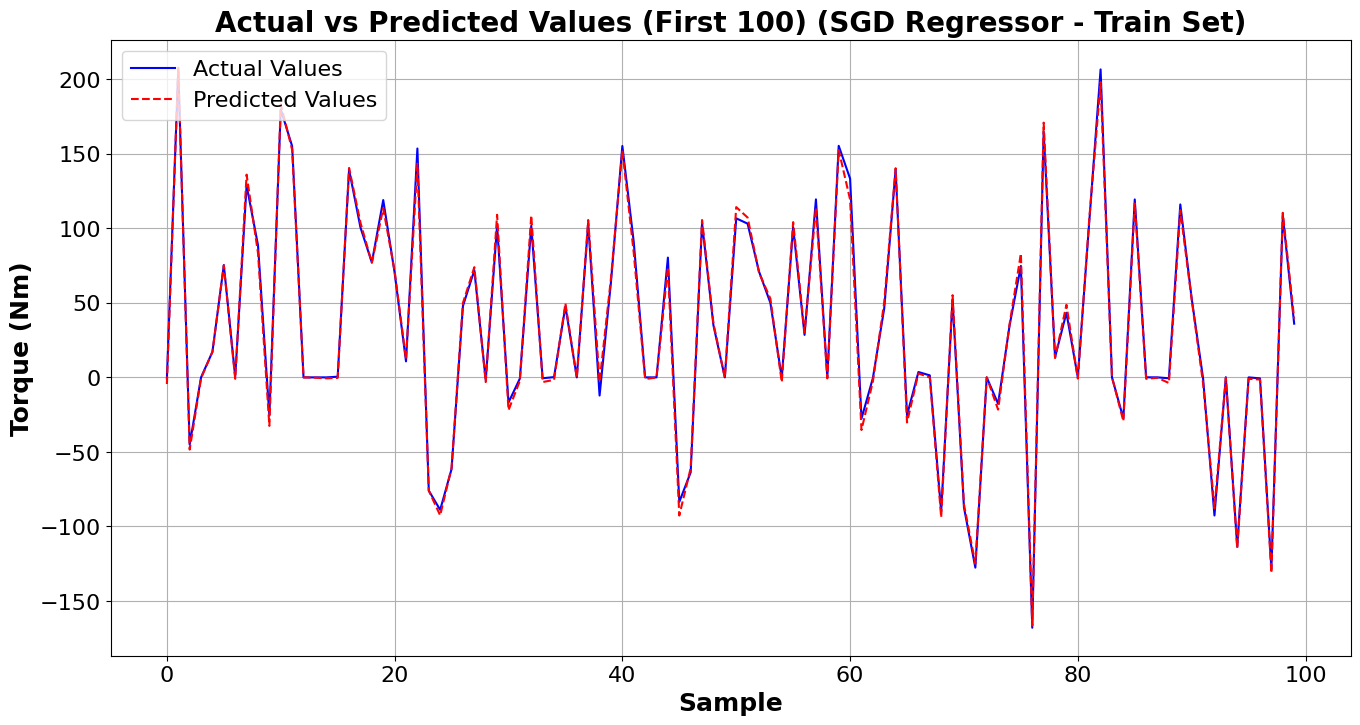

In [21]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_sgdr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (SGD Regressor - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

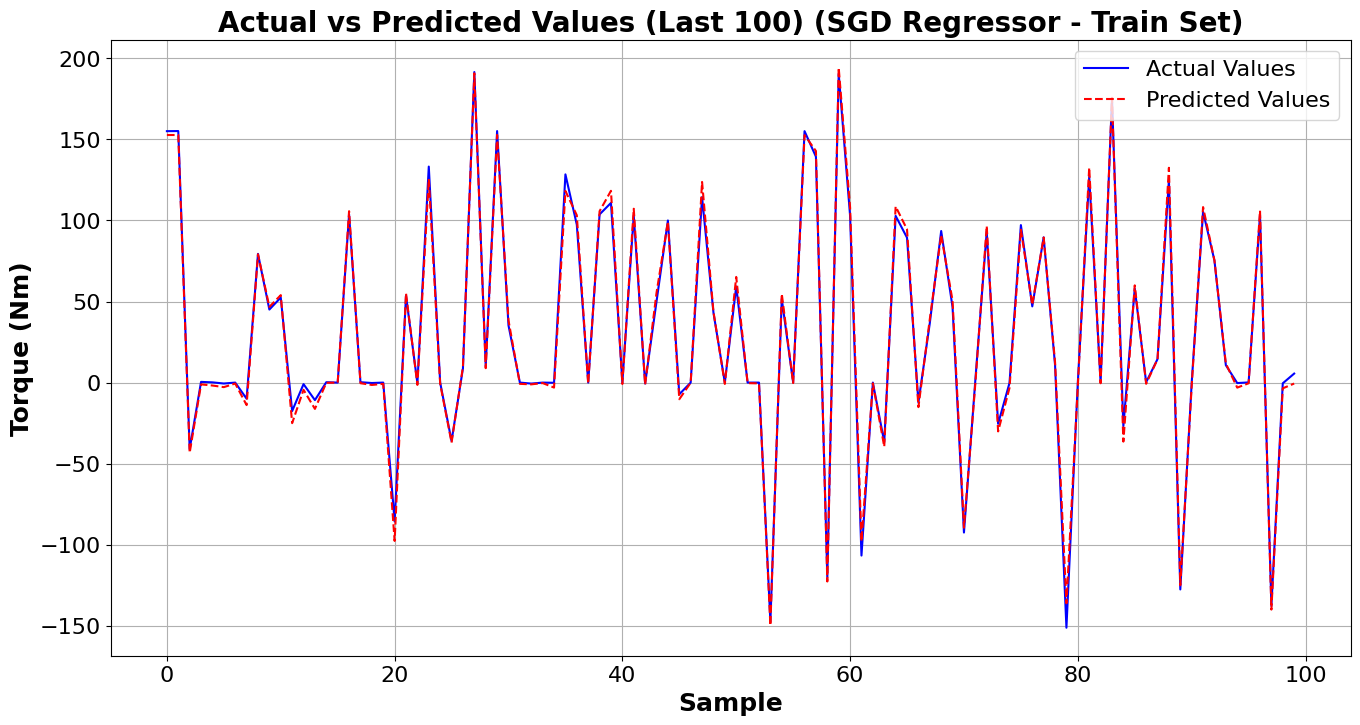

In [22]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_sgdr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (SGD Regressor - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

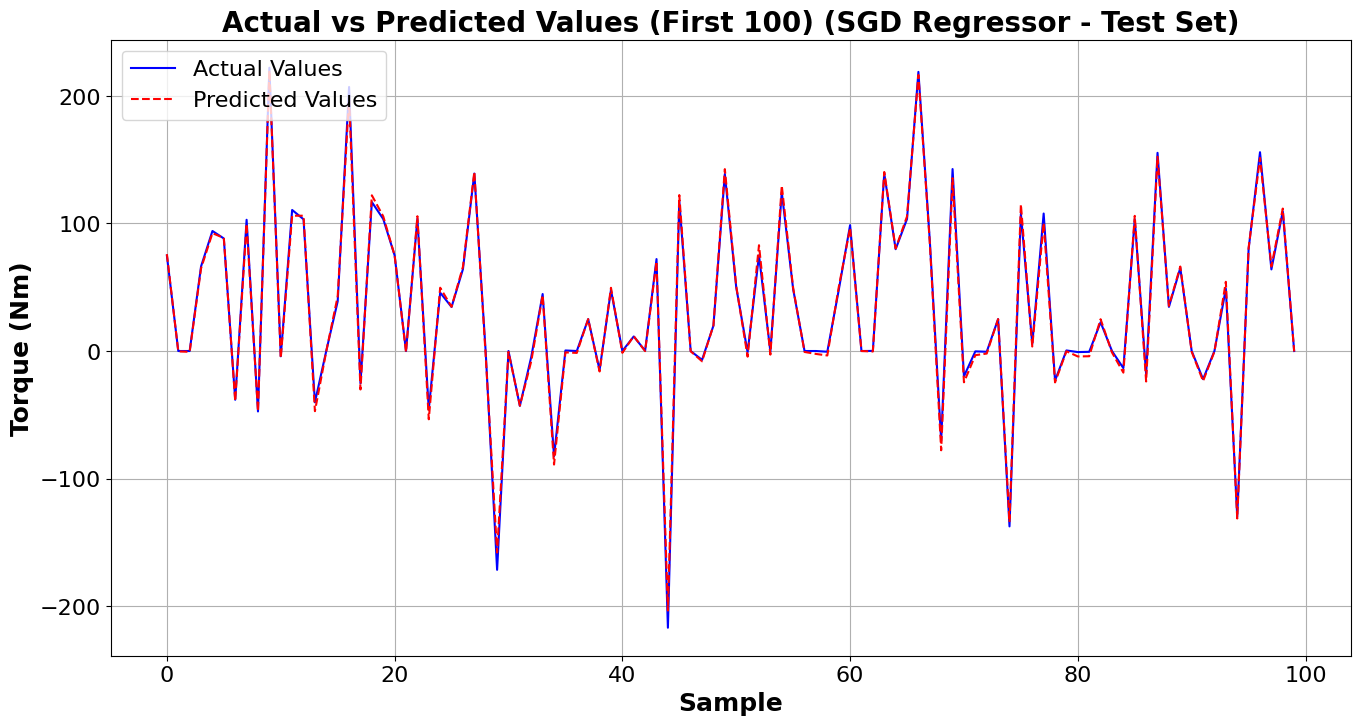

In [23]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_sgdr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (SGD Regressor - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

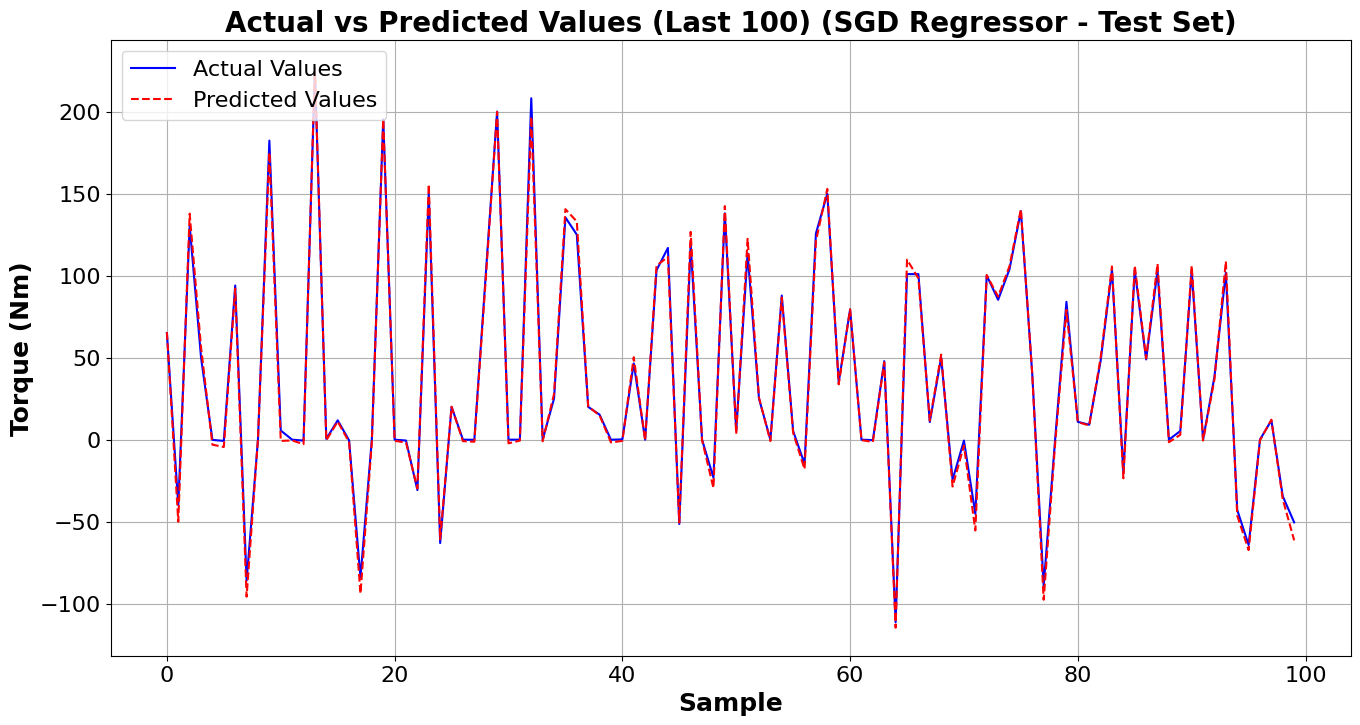

In [24]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_sgdr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (SGD Regressor - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
print('Coefficient and intercept for the model:')
print('Coefficients:',sgdr_model.coef_) # type: ignore
print('Intercept:',sgdr_model.intercept_) # type: ignore

Coefficient and intercept for the model:
Coefficients: [-1.96670128e-01 -5.04386202e+00 -3.02201123e+00  7.18259486e+01
 -4.68122282e-01  6.99076569e+00 -1.06040327e+01 -1.59639527e-02
  4.65915143e+00 -2.62939008e-01 -1.81956140e+00]
Intercept: [31.12018764]


In [ ]:
print('Final Equation:')
print('Torque = {}*u_q + {}*u_d + {}*i_d + \n{}*i_q + {}*coolant + {}*stator_winding + \n{}*stator_tooth + {}*pm + {}*stator_yoke + \n{}*ambient + {}*speed + {}'.format(\
          round(sgdr_model.coef_[0],6), round(sgdr_model.coef_[1],6), # type: ignore
          round(sgdr_model.coef_[2],6), round(sgdr_model.coef_[3],6), # type: ignore
          round(sgdr_model.coef_[4],6), round(sgdr_model.coef_[5],6), # type: ignore
          round(sgdr_model.coef_[6],6), round(sgdr_model.coef_[7],6), # type: ignore
          round(sgdr_model.coef_[8],6), round(sgdr_model.coef_[9],6), # type: ignore
          round(sgdr_model.coef_[10],6), round(sgdr_model.intercept_[0],6))) # type: ignore

Final Equation:
Torque = -0.19667*u_q + -5.043862*u_d + -3.022011*i_d + 
71.825949*i_q + -0.468122*coolant + 6.990766*stator_winding + 
-10.604033*stator_tooth + -0.015964*pm + 4.659151*stator_yoke + 
-0.262939*ambient + -1.819561*speed + 31.120188


In [27]:
# Saving the model
joblib.dump(sgdr_model,'SGDRegressor_Torque.pkl')

['SGDRegressor_Torque.pkl']

## Neural Network

In [11]:
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Input, Dense # type: ignore
from keras import optimizers

In [ ]:
# Splitting the training dataset further into a training subset and validation subset
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_scaled, 
                                                              y_train, 
                                                              test_size=0.2, 
                                                              shuffle=False,
                                                              random_state=0)

In [20]:
# Designing the neural network
model = Sequential()
model.add(Input(shape=(X_train_nn.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

# Training the model
history = model.fit(X_train_nn, y_train_nn,
                    validation_data=(X_val_nn, y_val_nn),
                    epochs=100,
                    batch_size=512,
                    verbose=1)

Epoch 1/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - loss: 5196.7451 - mean_squared_error: 5196.7451 - val_loss: 1074.7551 - val_mean_squared_error: 1074.7551
Epoch 2/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 566.4041 - mean_squared_error: 566.4041 - val_loss: 46.6238 - val_mean_squared_error: 46.6238
Epoch 3/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 34.0935 - mean_squared_error: 34.0935 - val_loss: 13.2404 - val_mean_squared_error: 13.2404
Epoch 4/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 10.0912 - mean_squared_error: 10.0912 - val_loss: 5.5483 - val_mean_squared_error: 5.5483
Epoch 5/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - loss: 4.7587 - mean_squared_error: 4.7587 - val_loss: 3.6582 - val_mean_squared_error: 3.6582
Epoch 6/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 3.3049 - mean_squared_error: 3.3049 - val_loss: 2.9521 - val_mean_squared_error: 2.9521
Epoch 7/100
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step -

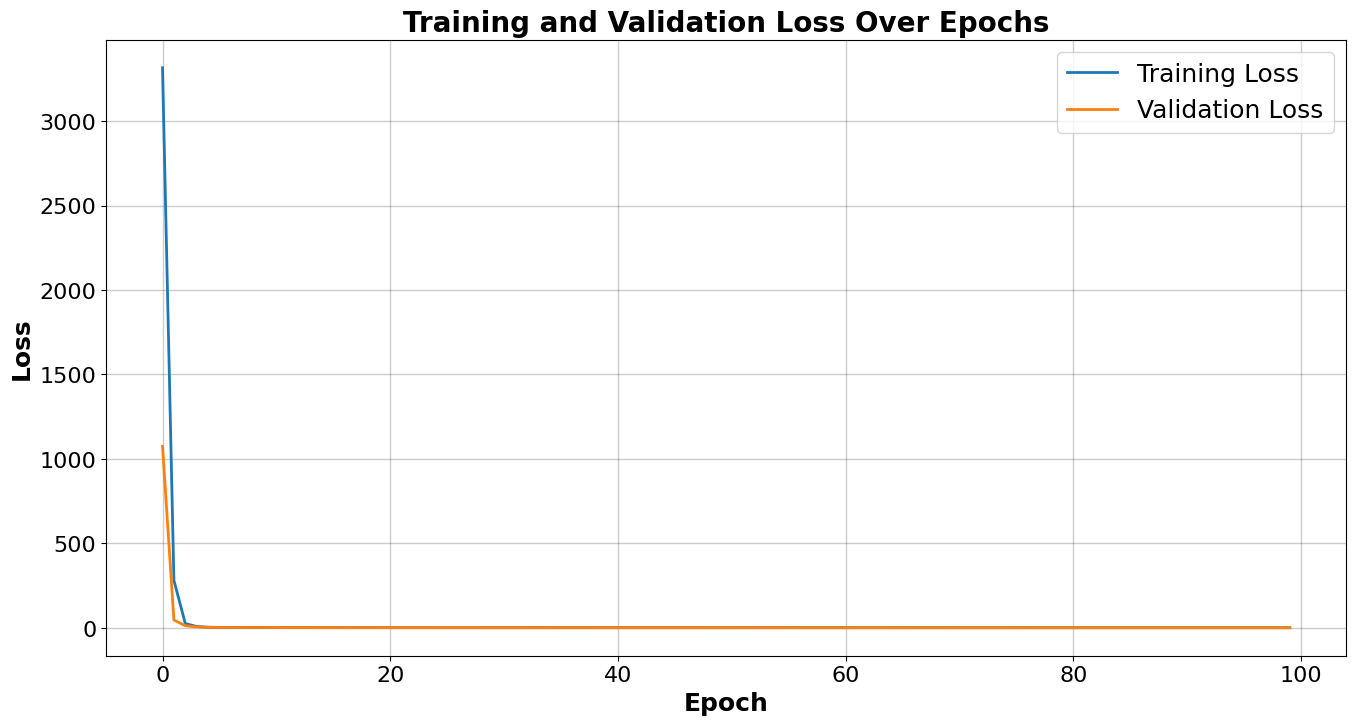

In [22]:
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=18, weight = 'bold')
plt.ylabel('Loss', color='black', fontsize=18, weight = 'bold')
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=20, fontweight = 'bold')
plt.legend(fontsize=18, ncol=1, loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

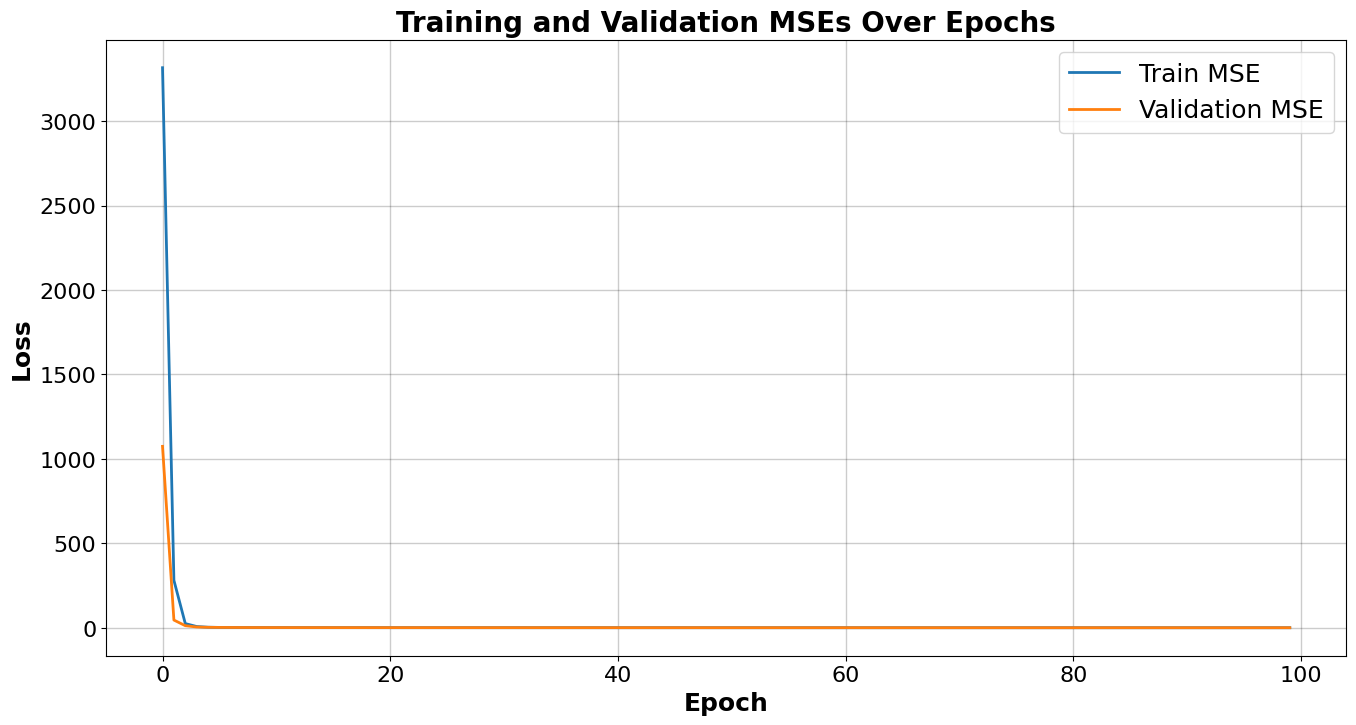

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(history.history['mean_squared_error'], label='Train MSE', linewidth=2)
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=18, weight = 'bold')
plt.ylabel('Loss', color='black', fontsize=18, weight = 'bold')
plt.title('Training and Validation MSEs Over Epochs', color='black', fontsize=20, fontweight = 'bold')
plt.legend(fontsize=18, ncol=1, loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [12]:
model = keras.saving.load_model('NN_ReLU_Torque.h5') 

In [ ]:
y_train_pred_nnmd = model.predict(X_train_scaled) # type: ignore
y_test_pred_nnmd = model.predict(X_test_scaled) # type: ignore

33271/33271 ━━━━━━━━━━━━━━━━━━━━ 25s 752us/step
8318/8318 ━━━━━━━━━━━━━━━━━━━━ 7s 789us/step


In [ ]:
mse_train_nnmd = mean_squared_error(y_train, y_train_pred_nnmd)
mse_test_nnmd = mean_squared_error(y_test, y_test_pred_nnmd)
r2_train_nnmd = r2_score(y_train, y_train_pred_nnmd)
r2_test_nnmd = r2_score(y_test, y_test_pred_nnmd)

print('Train MSE:', round(mse_train_nnmd, 6)) # type: ignore
print('Test MSE:', round(mse_test_nnmd, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_nnmd, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_nnmd, 6)) # type: ignore

Train MSE: 1.195187
Test MSE: 1.165287
Train R2 Score: 0.999799
Test R2 Score: 0.999805


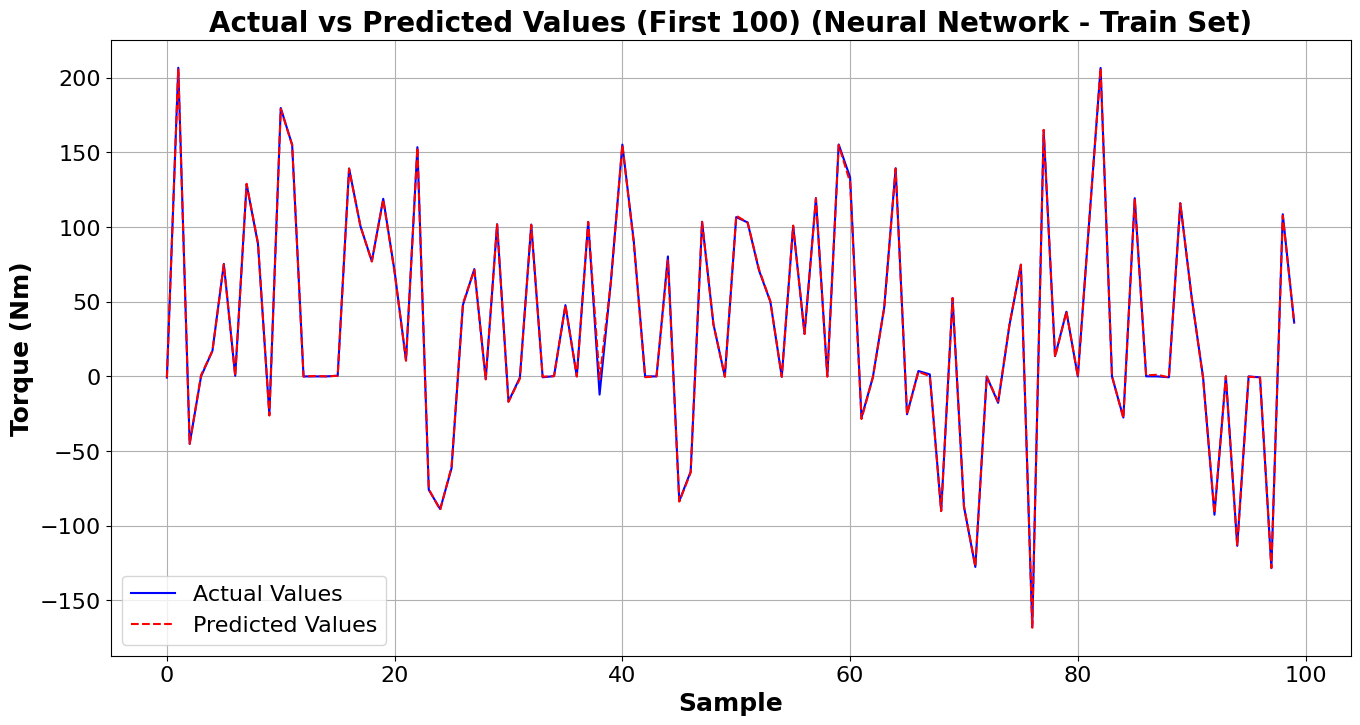

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_nnmd[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Neural Network - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

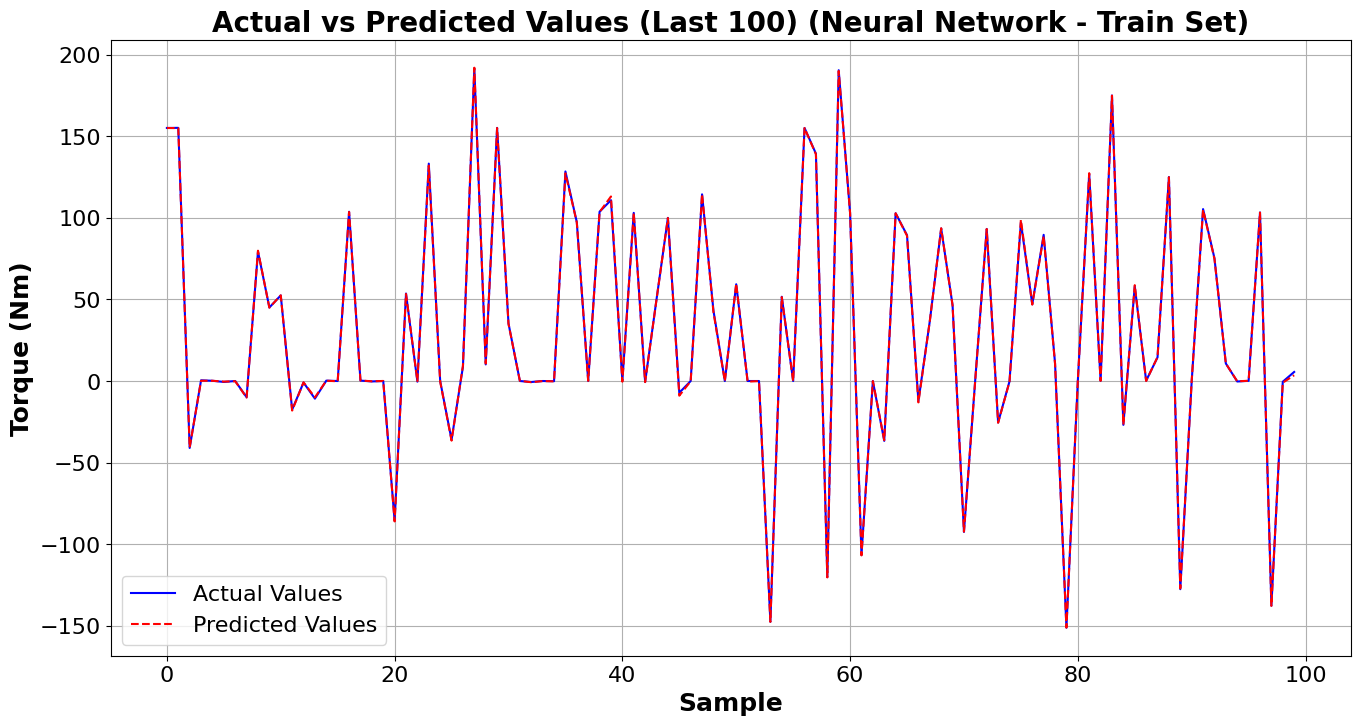

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_nnmd[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Neural Network - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

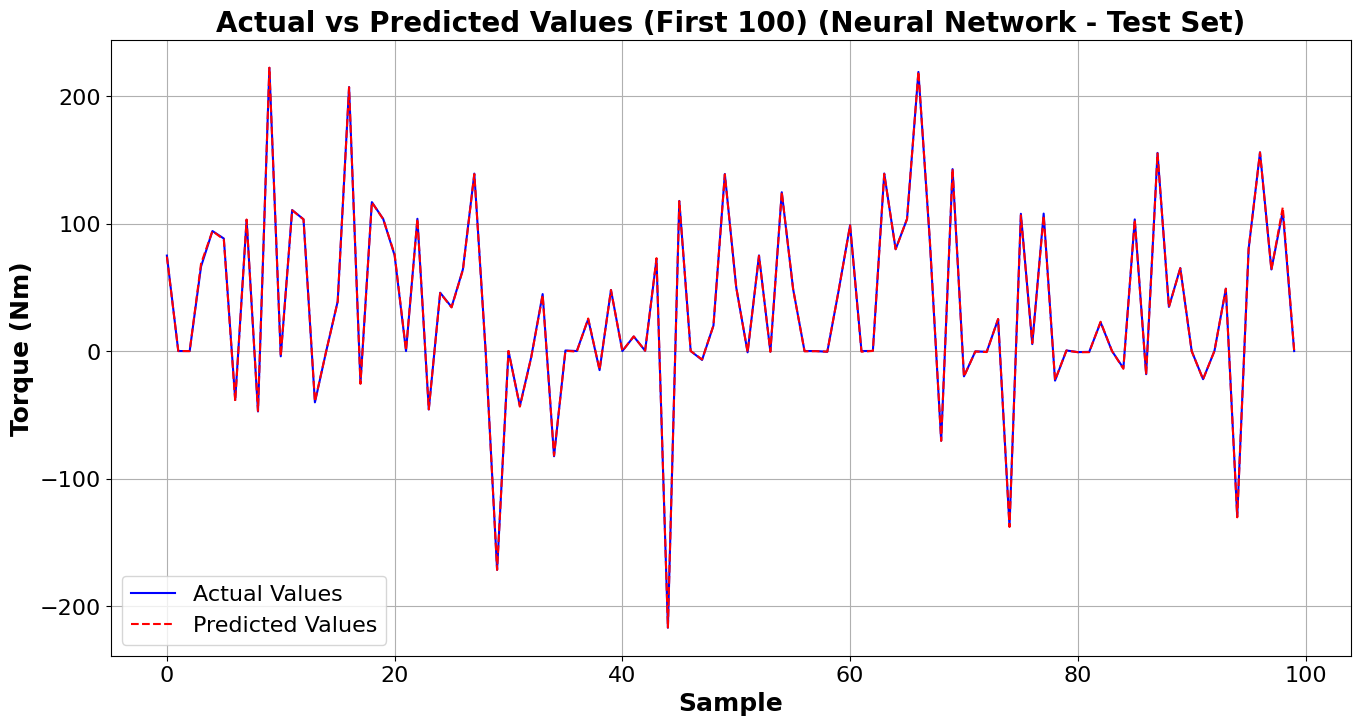

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_nnmd[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Neural Network - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

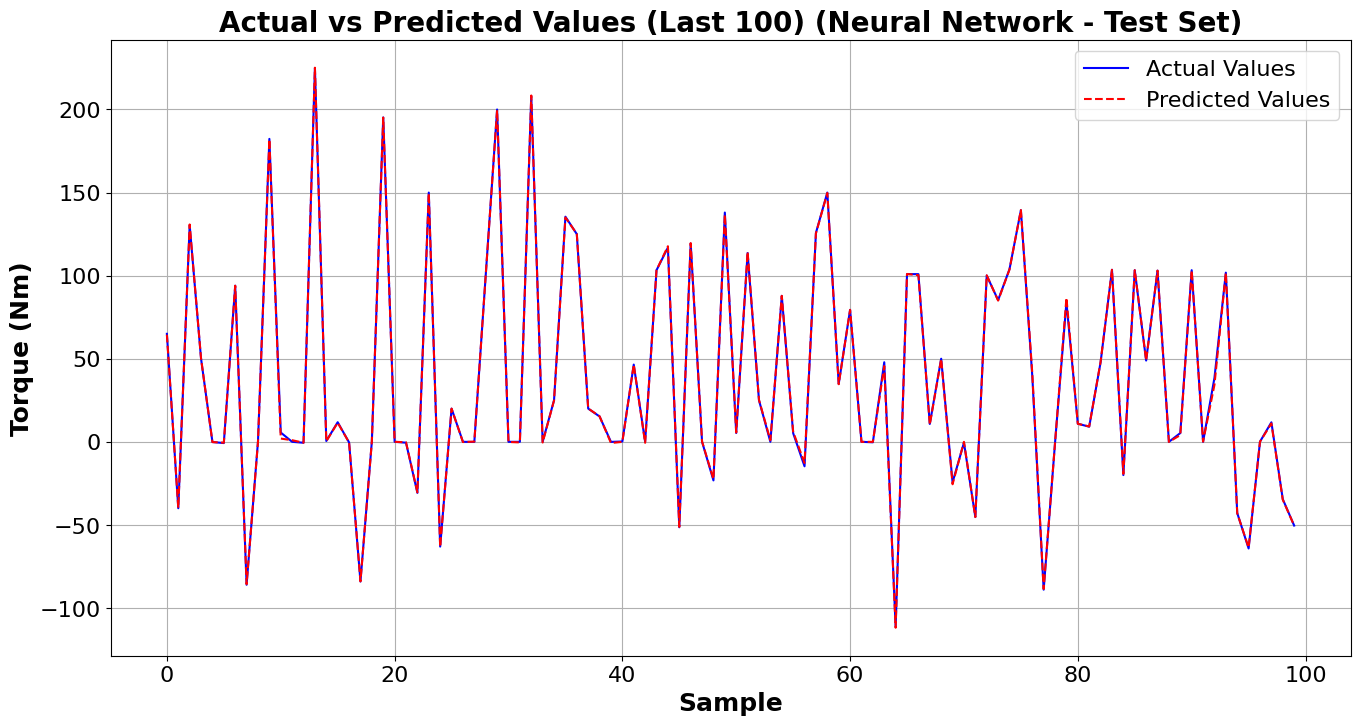

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_nnmd[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Neural Network - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Saving the model
model.save('NN_ReLU_Torque.h5') # type: ignore

In [11]:
from keras import models
nn_mod = models.load_model('NN_ReLU_Torque.h5')
nn_mod.summary() # type: ignore

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,523 (13.77 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Gradient Boosting Regressor

In [11]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [12]:
# Defining the parameter grid
parameters6 = {
    'loss': ['squared_error', 'absolute_error'],
    'learning_rate': [0.1, 0.25, 0.5, 1],
    'max_iter': [100, 250],
    'l2_regularization': [0, 0.25, 0.5, 1],
    'tol': [1e-5, 1e-6, 1e-7],
    'max_leaf_nodes': [31, 62],
    'min_samples_leaf': [20, 40]
}

In [13]:
halving_search6 = HalvingGridSearchCV(estimator=HistGradientBoostingRegressor(),
                                     param_grid=parameters6,
                                     cv=5,
                                     factor=2,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search6.fit(X_train_scaled, y_train)

n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 10
min_resources_: 2079
max_resources_: 1064652
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 768
n_resources: 2079
Fitting 5 folds for each of 768 candidates, totalling 3840 fits
----------
iter: 1
n_candidates: 384
n_resources: 4158
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
----------
iter: 2
n_candidates: 192
n_resources: 8316
Fitting 5 folds for each of 192 candidates, totalling 960 fits
----------
iter: 3
n_candidates: 96
n_resources: 16632
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 4
n_candidates: 48
n_resources: 33264
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 5
n_candidates: 24
n_resources: 66528
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 6
n_candidates: 12
n_resources: 133056
Fitting 5 folds for each of 12 candidates, totalling 60 fits


d:\Python\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 7
n_candidates: 6
n_resources: 266112
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 8
n_candidates: 3
n_resources: 532224
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 9
n_candidates: 2
n_resources: 1064448
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(estimator=HistGradientBoostingRegressor(), factor=2,
                    n_jobs=-1,
                    param_grid={'l2_regularization': [0, 0.25, 0.5, 1],
                                'learning_rate': [0.1, 0.25, 0.5, 1],
                                'loss': ['squared_error', 'absolute_error'],
                                'max_iter': [100, 250],
                                'max_leaf_nodes': [31, 62],
                                'min_samples_leaf': [20, 40],
                                'tol': [1e-05, 1e-06, 1e-07]},
                    verbose=3)

In [14]:
print('Best parameters found:', halving_search6.best_params_)

Best parameters found: {'l2_regularization': 0.5, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_iter': 250, 'max_leaf_nodes': 62, 'min_samples_leaf': 20, 'tol': 1e-06}


In [15]:
# Creating the model with the optimal parameters
hgbr_model = halving_search6.best_estimator_

y_train_pred_hgbr = hgbr_model.predict(X_train_scaled)  # type: ignore
y_test_pred_hgbr = hgbr_model.predict(X_test_scaled) # type: ignore

In [16]:
mse_train_hgbr = mean_squared_error(y_train, y_train_pred_hgbr)
mse_test_hgbr = mean_squared_error(y_test, y_test_pred_hgbr)
r2_train_hgbr = r2_score(y_train, y_train_pred_hgbr)
r2_test_hgbr = r2_score(y_test, y_test_pred_hgbr)

print('Train MSE:', round(mse_train_hgbr, 6)) # type: ignore
print('Test MSE:', round(mse_test_hgbr, 6)) # type: ignore
print('Train R2 Score:', round(r2_train_hgbr, 6)) # type: ignore
print('Test R2 Score:', round(r2_test_hgbr, 6)) # type: ignore

Train MSE: 0.479665
Test MSE: 0.555813
Train R2 Score: 0.999919
Test R2 Score: 0.999907


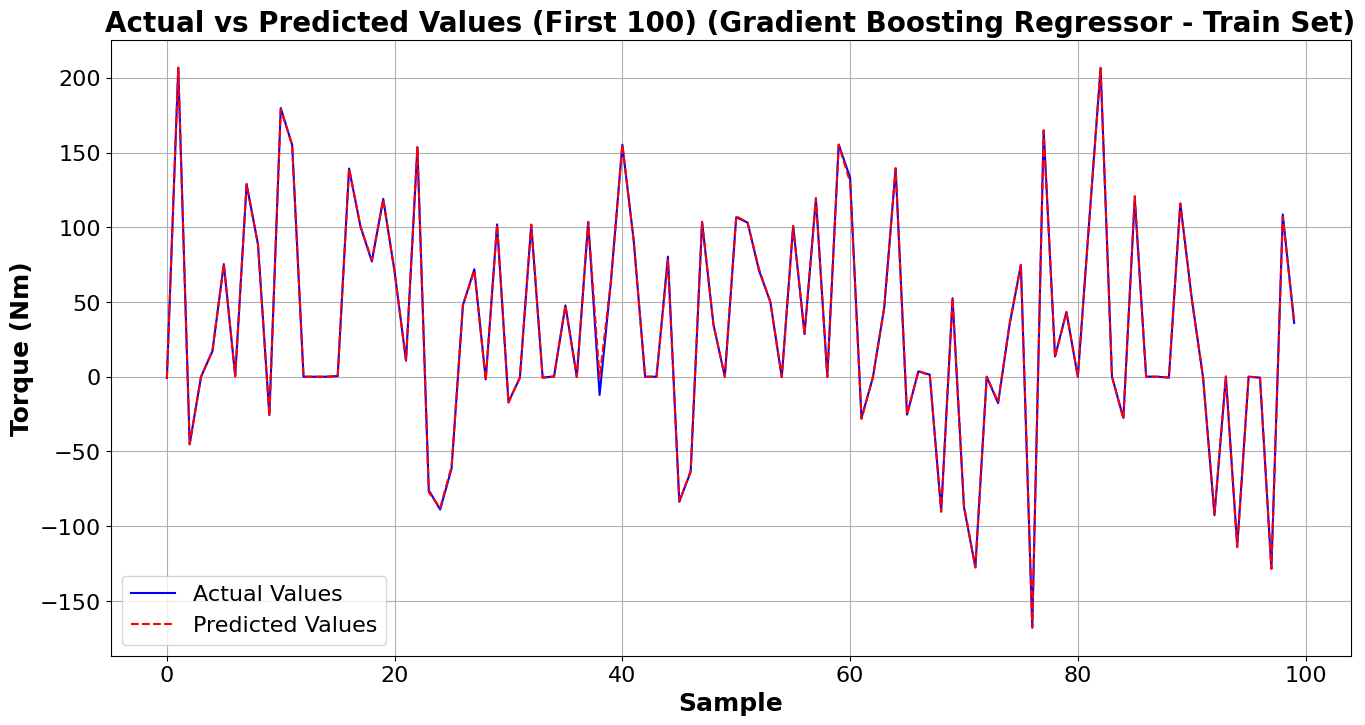

In [17]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[:100], label='Actual Values', color='blue')
plt.plot(y_train_pred_hgbr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Gradient Boosting Regressor - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

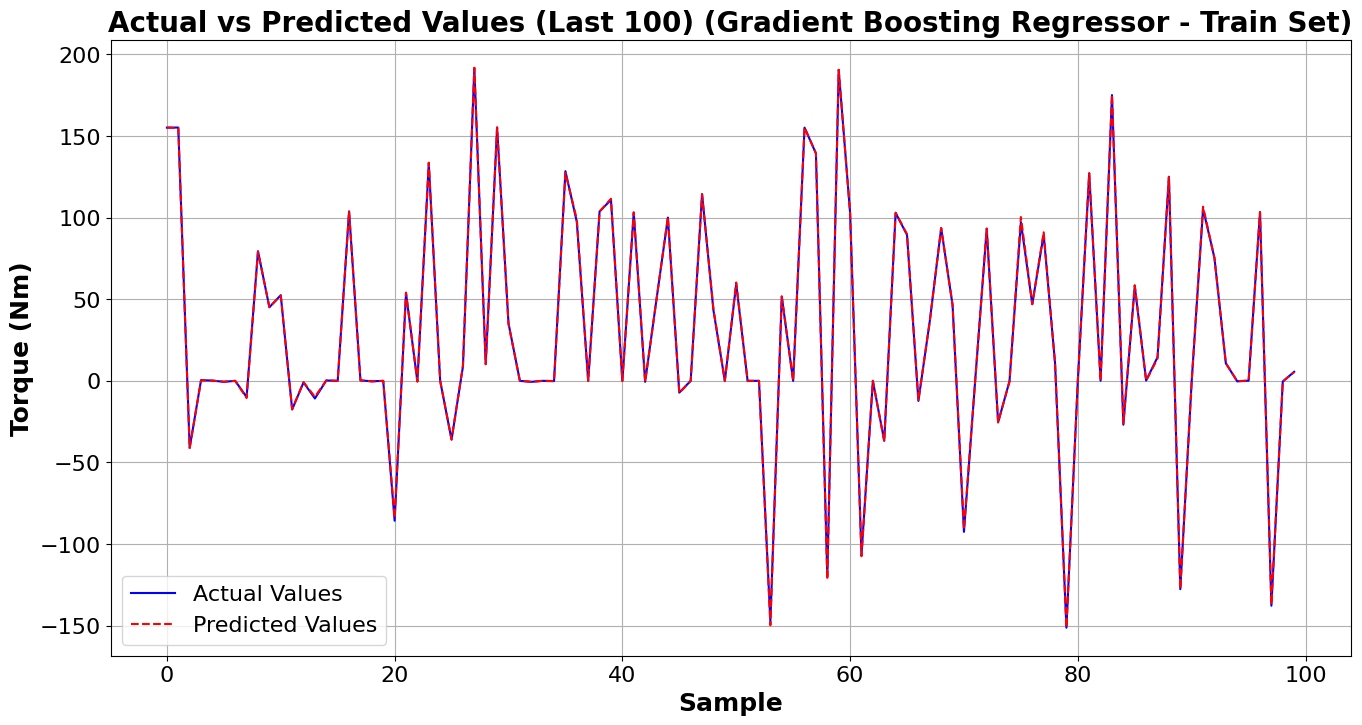

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(y_train[-100:], label='Actual Values', color='blue')
plt.plot(y_train_pred_hgbr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Gradient Boosting Regressor - Train Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

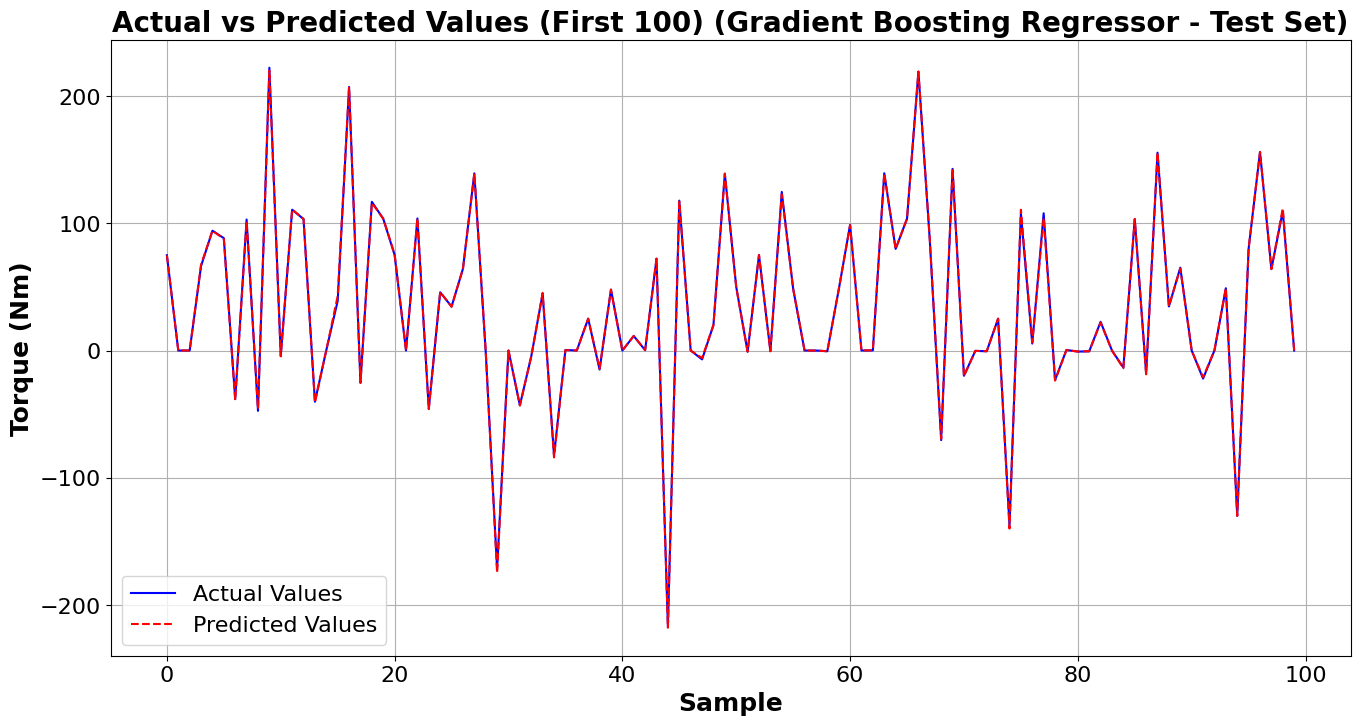

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_test_pred_hgbr[:100], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (First 100) (Gradient Boosting Regressor - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='lower left')
plt.grid(True)
plt.show()

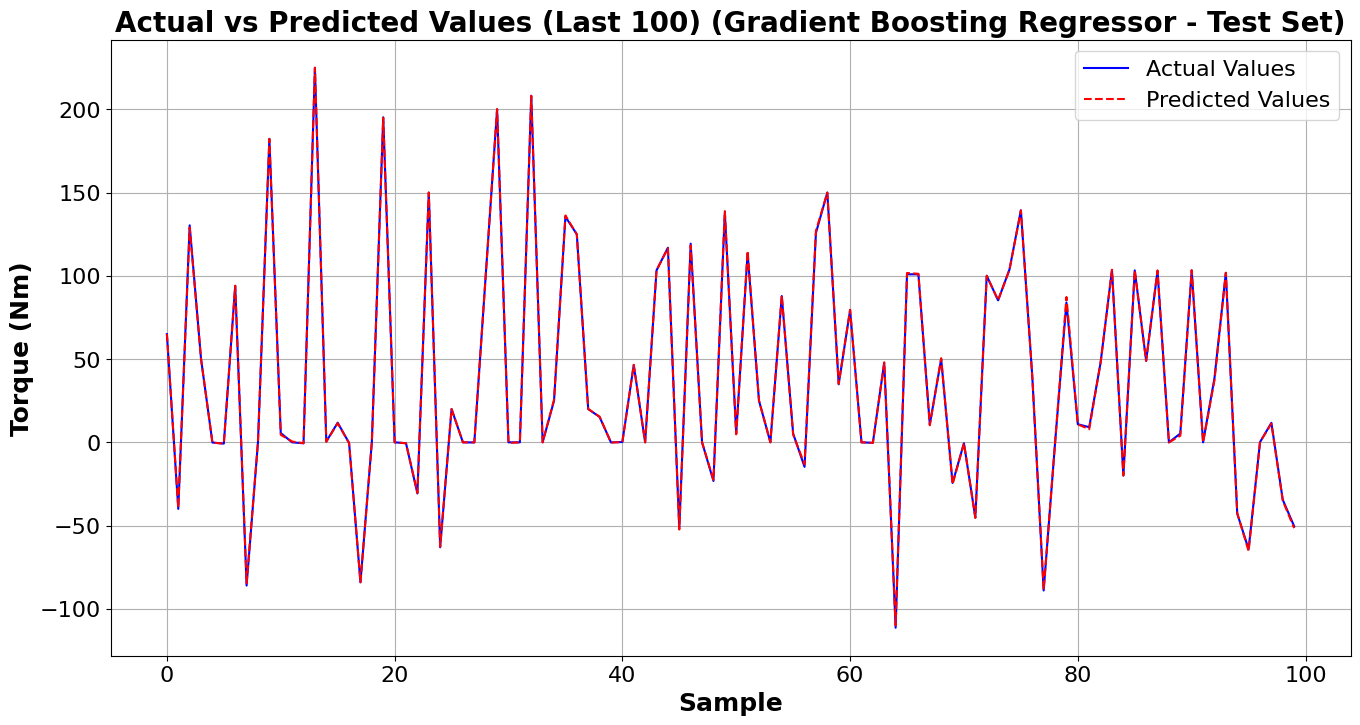

In [20]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-100:], label='Actual Values', color='blue')
plt.plot(y_test_pred_hgbr[-100:], label='Predicted Values', color='red', linestyle='--')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Actual vs Predicted Values (Last 100) (Gradient Boosting Regressor - Test Set)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize=16, ncol=1, loc='upper right')
plt.grid(True)
plt.show()

In [21]:
# Saving the model
joblib.dump(hgbr_model,'HistGradientBoostingRegressor_Torque.pkl')

['HistGradientBoostingRegressor_Torque.pkl']

***